# Background

Transjakarta, sebagai tulang punggung sistem transportasi umum di Jakarta, telah lama berdiri sebagai simbol komitmen pemerintah kota untuk menyediakan akses transportasi yang aman, nyaman, dan terjangkau bagi warganya. Dengan jaringan rute yang luas dan armada yang terus bertambah, Transjakarta berupaya melayani kebutuhan mobilitas urban yang kompleks, sambil menghadapi tantangan pengurangan kemacetan dan polusi udara. Namun, di balik upaya ini, terdapat masalah keuangan yang signifikan yang menghambat operasi dan pengembangannya.

# Problem Statements

Pada intinya, Transjakarta menghadapi dilema finansial yang krusial: banyaknya perjalanan yang diberlakukan secara gratis mengurangi potensi pendapatan, sementara dukungan finansial dari pemerintah terus menurun setiap tahun. Kondisi ini menimbulkan pertanyaan penting tentang keberlanjutan jangka panjang sistem transportasi ini dalam melayani masyarakat tanpa mengorbankan kualitas layanan atau kesehatan finansial organisasi.

# Goals

Melalui analisis data transaksi Transjakarta, tujuan utama dari penelitian ini adalah untuk mengeksplorasi peluang optimalisasi biaya yang dapat dibebankan kepada penumpang. Dengan memahami pola dan tren dalam data transaksi, kami berharap dapat mengidentifikasi area di mana efisiensi biaya dapat dicapai tanpa mengurangi kualitas layanan. Analisis ini bertujuan untuk memberikan wawasan yang dapat membantu Transjakarta tidak hanya mencapai titik impas, tapi juga mengarah pada operasi yang lebih berkelanjutan secara finansial, memastikan bahwa transportasi umum tetap menjadi pilihan yang layak dan menarik bagi warga Jakarta.

# Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import datetime


In [29]:
# Config untuk adjust output
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [32]:
# Config untuk reset default
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# Data Understanding

## Data Overall

Dataset Transjakarta adalah kumpulan data komprehensif yang mencatat detail perjalanan penumpang yang menggunakan layanan Bus Rapid Transit (BRT) Transjakarta. Dataset ini berisi berbagai informasi yang terkait dengan aspek transaksi, demografi penumpang, rute perjalanan, serta waktu dan biaya yang berkaitan dengan setiap perjalanan. Melalui identifikasi unik dari transaksi (`transID`) dan kartu pembayaran (`payCardID`), dataset ini memungkinkan pelacakan pergerakan individu dalam jaringan transportasi, dari titik awal (`tapInStops`) hingga titik akhir (`tapOutStops`) perjalanan mereka.

Setiap entri dalam dataset mencakup informasi tentang bank penerbit kartu (`payCardBank`), nama pemegang kartu (`payCardName`), serta jenis kelamin (`payCardSex`) dan tanggal lahir (`payCardBirthDate`) yang memberikan wawasan demografis tentang pengguna. Selain itu, dataset ini merinci koridor atau rute (`corridorID`, `corridorName`), arah perjalanan (`direction`), dan informasi spesifik tentang pemberangkatan (`tapInStops`, `tapInStopsName`, `tapInStopsLat`, `tapInStopsLon`) dan pemberhentian kedatangan (`tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`), termasuk urutan pemberhentian ini di koridor (`stopStartSeq`, `stopEndSeq`). Waktu keberangkatan (`tapInTime`) dan kedatangan (`tapOutTime`) penumpang dicatat untuk analisis waktu perjalanan, sementara jumlah yang dibayarkan (`payAmount`) menyediakan data kritis untuk analisis keuangan layanan Transjakarta.

Menganalisis dataset ini membuka peluang untuk memahami pola pergerakan penumpang, efisiensi layanan, preferensi rute, dan aspek demografis pengguna, yang semuanya penting untuk perencanaan dan pengembangan layanan transportasi umum yang lebih baik dan lebih responsif.

Berikut adalah 5 catatan teratas dan 5 catatan terbawah dari dataset ini.

In [4]:
# Ambil data dari csv
df = pd.read_csv('Transjakarta.csv')

# Show first 5 records
display(df.head())

# Show last 5 records
display(df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


Berikut penjelasan untuk setiap kolom dalam dataset Transjakarta:

- `transID`: Pengidentifikasi unik untuk setiap transaksi atau perjalanan. Digunakan untuk membedakan antara perjalanan yang berbeda dalam dataset.
- `payCardID`: Nomor identifikasi kartu pembayaran yang digunakan untuk tap in atau tap out. Ini dapat digunakan untuk melacak penggunaan kartu individual.
- `payCardBank`: Nama bank atau lembaga keuangan yang mengeluarkan kartu pembayaran. Memberikan informasi tentang kemitraan dengan bank atau sistem pembayaran.
- `payCardName`: Nama pemegang kartu. Ini dapat memberikan wawasan demografis atau preferensi pengguna berdasarkan nama.
- `payCardSex`: Jenis kelamin pemegang kartu, berguna untuk analisis demografis pengguna.
- `payCardBirthDate`: Tanggal lahir pemegang kartu, yang dapat digunakan untuk memperkirakan usia pengguna dan melakukan analisis demografis.
- `corridorID`: Pengidentifikasi untuk koridor atau rute yang digunakan. Memberikan konteks geografis dan operasional terhadap perjalanan.
- `corridorName`: Nama koridor atau rute. Memberikan informasi lebih lanjut tentang jalur yang diambil selama perjalanan.
- `direction`: Arah perjalanan dalam koridor. Ini dapat digunakan untuk memahami pola pergerakan dalam sistem transportasi.
- `tapInStops`: Kode untuk halte di mana penumpang tap in. Ini menandai titik awal perjalanan.
- `tapInStopsName`: Nama halte di mana penumpang tap in, menawarkan detail lebih lanjut tentang lokasi awal.
- `tapInStopsLat`: Garis lintang dari halte tap-in, untuk analisis geospasial perjalanan.
- `tapInStopsLon`: Garis bujur dari halte tap-in, juga untuk analisis geospasial.
- `stopStartSeq`: Nomor urutan dari halte awal dalam koridor, menunjukkan posisi halte tap-in relatif terhadap rute.
- `tapInTime`: Waktu ketika penumpang tap in, penting untuk menganalisis waktu perjalanan dan pola penggunaan.
- `tapOutStops`: Kode untuk halte di mana penumpang tap out, menandai titik akhir perjalanan.
- `tapOutStopsName`: Nama halte tap-out, menawarkan detail lebih lanjut tentang lokasi akhir.
- `tapOutStopsLat`: Garis lintang dari halte tap-out, untuk analisis geospasial tujuan.
- `tapOutStopsLon`: Garis bujur dari halte tap-out, juga untuk analisis geospasial tujuan.
- `stopEndSeq`: Nomor urutan dari halte akhir dalam koridor, menunjukkan posisi halte tap-out relatif terhadap rute.
- `tapOutTime`: Waktu ketika penumpang tap out, penting untuk menganalisis durasi dan efisiensi perjalanan.
- `payAmount`: Jumlah yang dibayar untuk perjalanan, yang dapat digunakan untuk analisis keuangan dan penilaian pendapatan layanan Transjakarta.

## Data Types

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  object        
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  category      
 5   payCardBirthDate  37900 non-null  int32         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  category      
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

Output df.info() untuk dataset Transjakarta menyajikan gambaran terstruktur, menunjukkan sebuah DataFrame dengan 37.900 entri di 22 kolom, masing-masing mewakili aspek-aspek yang berbeda dari perjalanan penumpang pada layanan bus Transjakarta. Entri diindeks dari 0 hingga 37.899, mengilustrasikan rentang data yang komprehensif yang dikumpulkan.

Dataset ini mencakup berbagai jenis data, dengan campuran tipe data objek (data tekstual), bilangan bulat, dan bilangan pecahan, mencerminkan atribut kualitatif dan kuantitatif dari perjalanan-perjalanan:

- **Data Teks atau Kategorikal** (`object`): Termasuk pengidentifikasi dan informasi deskriptif seperti `transID`, `payCardBank`, `payCardName`, `payCardSex`, `corridorID`, `corridorName`, `tapInStops`, `tapInStopsName`, `tapOutStops`, `tapOutStopsName`, dan `tapInTime`, `tapOutTime`. Kolom-kolom ini berisi nilai non-null untuk semua atau sebagian besar entri, memberikan detail yang kaya tentang transaksi, demografi penumpang, dan spesifik dari titik awal dan akhir setiap perjalanan.

- **Identifikasi Numerik** (`int64`): Kolom-kolom seperti `payCardID`, `payCardBirthDate`, dan `stopStartSeq` adalah bilangan bulat, menawarkan ukuran kuantitatif yang tepat untuk mengidentifikasi kartu-kartu, memperkirakan usia penumpang, dan menandai urutan dari berhenti.

- **Variabel Kontinu** (`float64`): Termasuk arah, `tapInStopsLat`, `tapInStopsLon`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `payAmount`, menunjukkan data arah, koordinat geografis, informasi berhenti berurutan, dan jumlah pembayaran, secara berturut-turut. Ini penting untuk analisis spasial dan penilaian keuangan.

Kehadiran jumlah non-null yang kurang dari total entri dalam kolom-kolom seperti `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `payAmount` menandakan adanya data yang hilang, memerlukan strategi pembersihan atau imputasi untuk memastikan analisis yang komprehensif.

In [34]:
# payCardID menjadi object
df['payCardID'] = df['payCardID'].astype('object')

# payCardSex menjadi category
df['payCardSex'] = df['payCardSex'].astype('category')

# payCardBirthDate menjadi tahun (sudah dalam format tahun, hanya perlu dipastikan tipe datanya sesuai)
df['payCardBirthDate'] = pd.to_datetime(df['payCardBirthDate'], format='%Y').dt.year

# corridorID menjadi object
df['corridorID'] = df['corridorID'].astype('object')

# direction menjadi category
df['direction'] = df['direction'].astype('category')

# tapInStops dan tapOutStops menjadi object
df['tapInStops'] = df['tapInStops'].astype('object')
df['tapOutStops'] = df['tapOutStops'].astype('object')

# tapInTime dan tapOutTime menjadi datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  object        
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  category      
 5   payCardBirthDate  37900 non-null  int32         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  category      
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

Dalam proses analisis data, penting untuk memastikan bahwa setiap kolom dalam dataset memiliki tipe data yang sesuai untuk memaksimalkan efisiensi dan akurasi analisis. Berikut adalah alasan mengapa saya melakukan perubahan tipe data pada kolom-kolom tertentu:

1. `payCardID`: Awalnya, kolom `payCardID` memiliki tipe data bilangan bulat. Namun, mengingat bahwa `payCardID` sebenarnya adalah identifikasi unik untuk kartu pembayaran yang digunakan oleh pelanggan, tipe data ini diubah menjadi `object`.

2. `payCardSex`: Kolom ini diubah menjadi tipe data `category` karena hanya berisi sejumlah kecil kategori unik (jenis kelamin). Menggunakan tipe data `category` dapat menghemat memori dan memudahkan analisis yang melibatkan operasi kategorikal.

3. `payCardBirthDate`: Kolom ini hanya berisi tahun lahir, dan diubah menjadi tipe data `datetime` untuk memudahkan perhitungan usia dan analisis yang terkait dengan waktu. Meskipun hanya tahun yang digunakan, mengadopsi tipe data `datetime` mempersiapkan struktur data untuk analisis tanggal yang lebih luas jika diperlukan.

4. `corridorID`: Diubah menjadi tipe data `object` karena ini adalah pengidentifikasi unik yang berfungsi sebagai kategori atau label, bukan angka yang akan mengalami operasi matematika.

5. `direction`: Kolom ini diubah menjadi tipe data `category` karena menyimpan nilai biner yang mewakili dua arah perjalanan yang mungkin. Hal ini mengoptimalkan penyimpanan dan memudahkan interpretasi data.

6. `tapInStops` **dan** `tapOutStops`: Diubah menjadi tipe data `object` karena mereka adalah identifikasi untuk berhenti. Meskipun numerik, nilai-nilai ini tidak diperlakukan sebagai nilai numerik tetapi sebagai kategori atau label.

7. `tapInTime` **dan** `tapOutTime`: Diubah menjadi tipe data `datetime` untuk memungkinkan analisis yang terkait dengan waktu, seperti menghitung durasi perjalanan. Format `datetime` memberikan fleksibilitas dalam memanipulasi dan menghitung tanggal dan waktu.

Perubahan tipe data ini bertujuan untuk memastikan bahwa data disimpan dalam format yang paling sesuai untuk analisis lebih lanjut, mengoptimalkan penggunaan memori, dan memudahkan pemrosesan dan interpretasi data.

## Missing Values

In [35]:
# Memunculkan jumlah missing value setiap field
df.isna().sum().sort_values(ascending = False)

tapOutStops         2289
corridorName        1930
tapOutTime          1344
stopEndSeq          1344
tapOutStopsLon      1344
tapOutStopsLat      1344
tapOutStopsName     1344
corridorID          1257
tapInStops          1213
payAmount           1007
stopStartSeq           0
tapInTime              0
transID                0
tapInStopsLon          0
payCardID              0
tapInStopsName         0
direction              0
payCardBirthDate       0
payCardSex             0
payCardName            0
payCardBank            0
tapInStopsLat          0
dtype: int64

<Axes: >

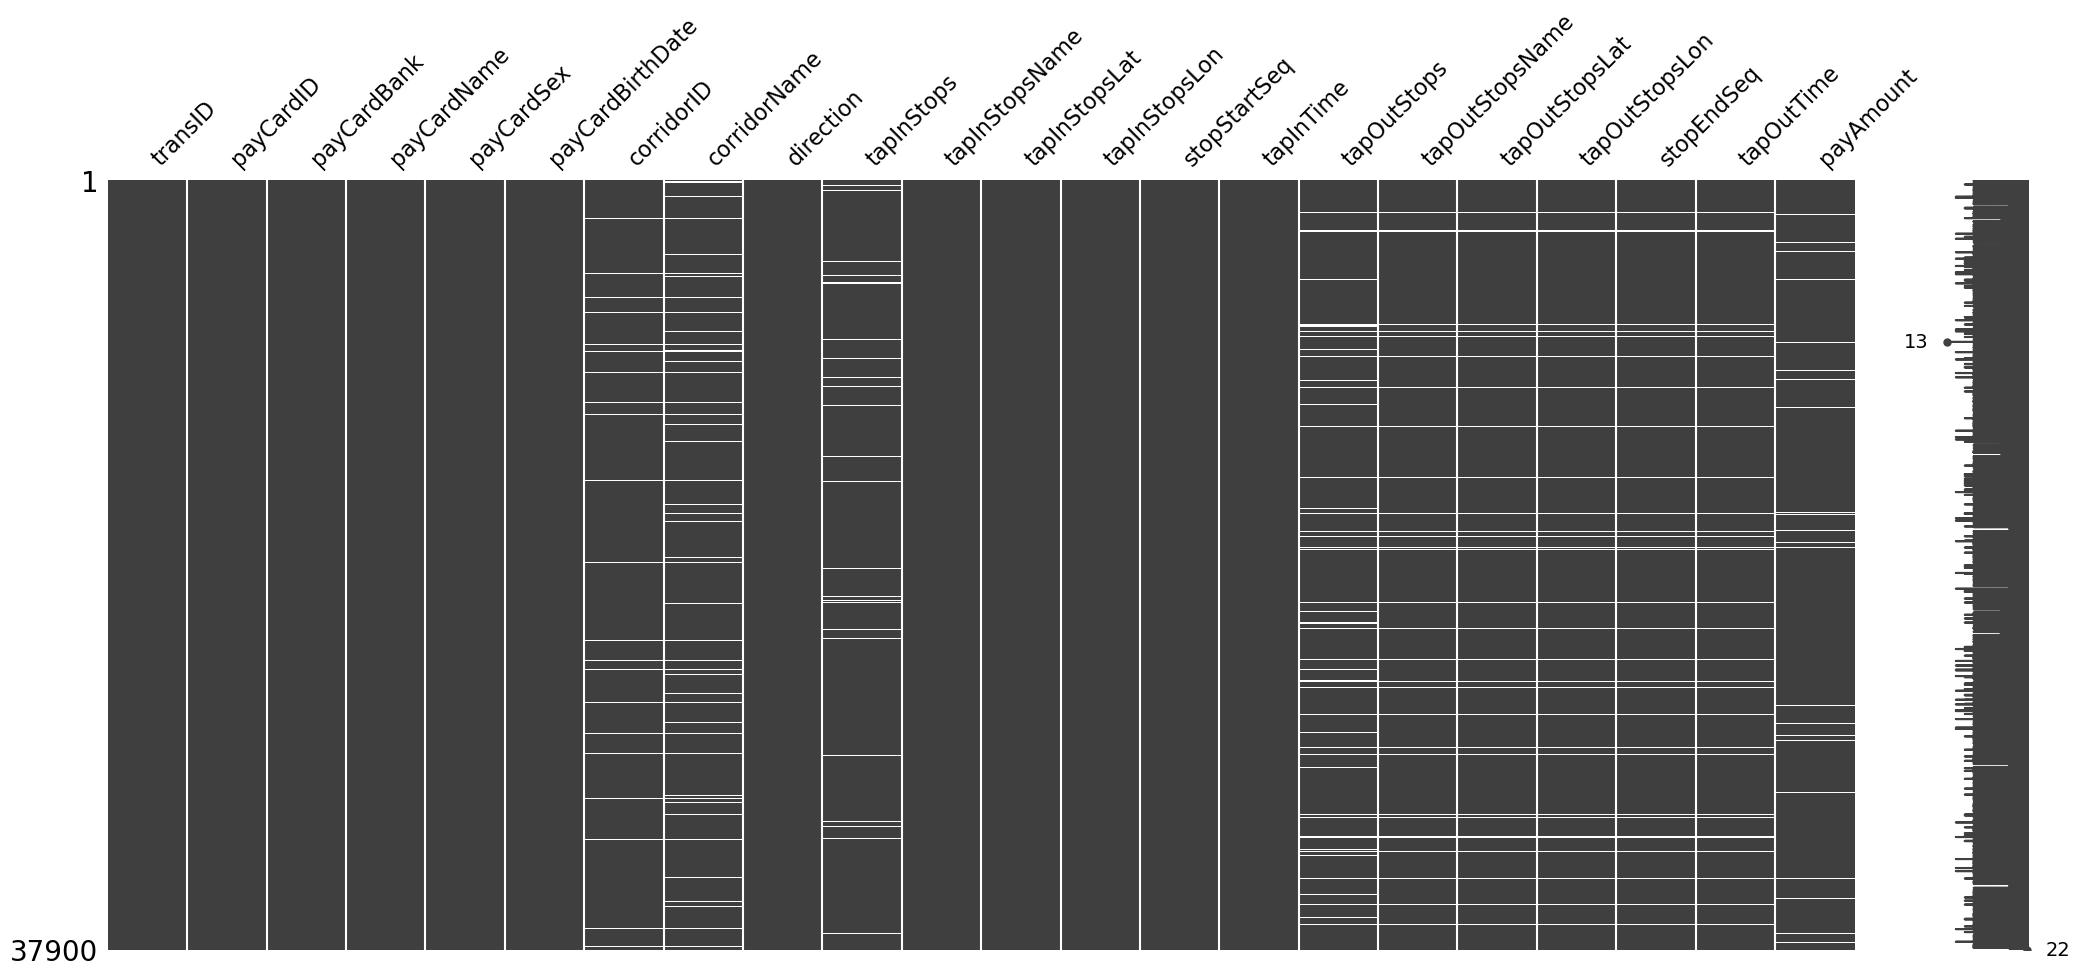

In [36]:
# Memvisualisasikan pola missing values dalam DataFrame yang telah dibersihkan
missingno.matrix(df)

Analisis nilai yang hilang dalam dataset Transjakarta menyoroti beberapa kolom kunci dengan tingkat kelengkapan data yang beragam. Kolom `tapOutStops` memiliki jumlah nilai yang hilang tertinggi, mencapai 2.289, menunjukkan bahwa untuk banyak perjalanan, halte tap-out tidak tercatat. Ini diikuti oleh `corridorName` dengan 1.930 entri yang hilang, menunjukkan bahwa nama koridor spesifik untuk sejumlah besar perjalanan tidak diketahui.

Demikian pula, `tapOutTime`, `stopEndSeq`, `tapOutStopsLon`, `tapOutStopsLat`, dan `tapOutStopsName` masing-masing memiliki 1.344 nilai yang hilang, yang sejalan dengan data yang hilang di `tapOutStops`, karena semua bidang ini terkait dengan titik akhir perjalanan. Pola data yang hilang ini bisa menunjukkan masalah dalam pengumpulan data pada akhir perjalanan, seperti penumpang yang tidak melakukan tap out.

Kemudian `corridorID` dan `tapInStops` memiliki 1.257 dan 1.213 nilai yang hilang, menunjukkan bahwa ada juga kesenjangan dalam mencatat ID koridor dan halte tap-in, meskipun dalam tingkat yang sedikit lebih rendah dibandingkan data tap-out.

Juga `payAmount` memiliki 1.007 nilai yang hilang, menunjukkan bahwa jumlah pembayaran tidak tercatat untuk beberapa transaksi. Hal ini bisa disebabkan oleh berbagai alasan, termasuk perjalanan gratis atau kesalahan dalam pengumpulan data.

Di sisi lain, beberapa kolom seperti `stopStartSeq`, `tapInTime`, `transID`, `tapInStopsLon`, `payCardID`, `tapInStopsName`, `direction`, `payCardBirthDate`, `payCardSex`, `payCardName`, `payCardBank`, dan `tapInStopsLat` tidak memiliki nilai yang hilang, menunjukkan kelengkapan dalam aspek-aspek dataset tersebut. Ini menunjukkan bahwa proses pengumpulan data lebih solid pada awal perjalanan dan dalam menangkap detail transaksi dan demografi penumpang.

Kehadiran nilai yang hilang, terutama berkonsentrasi di sekitar titik akhir perjalanan dan informasi pembayaran, menegaskan perlunya pembersihan data yang hati-hati dan pertimbangan terhadap teknik imputasi. Menangani nilai-nilai yang hilang ini sangat penting untuk setiap analisis selanjutnya, karena akan memastikan pemahaman yang lebih akurat dan komprehensif tentang perjalanan penumpang dan aspek keuangan dari layanan Transjakarta.

## Numeric Data Statistics

### Descriptive Statistics

In [37]:
# Mengambil field numeric dari dataset
numeric = df.select_dtypes(include='number')
numeric

,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
0,2008,-6.184631,106.84402,7,-6.203101,106.85715,12.0,3500.0
1,1997,-6.228700,106.83302,13,-6.217152,106.81892,21.0,3500.0
2,1992,-6.133132,106.81435,38,-6.133731,106.81475,39.0,3500.0
3,1978,-6.195743,106.93526,23,-6.183068,106.93194,29.0,3500.0
4,1982,-6.149650,106.88900,5,-6.135355,106.81143,15.0,3500.0
...,...,...,...,...,...,...,...,...
37895,2004,-6.196892,106.82309,2,-6.290967,106.82365,13.0,3500.0
37896,1974,-6.290154,106.88116,1,-6.291075,106.88634,2.0,3500.0
37897,1976,-6.216247,106.81676,12,-6.370321,106.89628,14.0,20000.0
37898,1976,-6.188656,106.80954,33,-6.188861,106.81135,34.0,0.0


In [38]:
# describe numeric field
display(df.describe(include=[np.number]))

,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,1990.089314,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,13.051482,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,1946.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1982.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,1990.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,2001.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,2012.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


**Kolom Numerik:**

1. `payCardBirthDate`:
    - **Range**: Dari 1946 hingga 2012, menunjukkan keragaman dalam usia pengguna.
    - **Mean vs Median**: Kedua nilai sangat dekat, menunjukkan distribusi yang mendekati normal dengan sedikit atau tanpa skewness.
    - **Asumsi Distribusi**: Dengan rentang dari 1946 hingga 2012 dan nilai mean dan median yang hampir sama, diasumsikan bahwa distribusi usia cenderung simetris dan mendekati normal, menunjukkan keragaman yang merata dari generasi pengguna.
2. `tapInStopsLat`:
    - **Range**: Dari -6,39 hingga -6,08, menunjukkan bahwa aktivitas tap-in terjadi dalam area geografis yang terbatas.
    - **Mean vs Median**: Dua nilai ini sangat dekat, yang menunjukkan bahwa sebagian besar halte tap-in terletak di dekat pusat geografis dataset.
    - **Asumsi Distribusi**: Distribusi dari `tapInStopsLat` kemungkinan simetris dan terpusat, menunjukkan penyebaran yang merata dari halte tap-in sekitar nilai rata-rata lintang.
3. `tapInStopsLon`:
    - **Range**: Dari 106,61 hingga 107,02, menunjukkan bahwa halte tap-in berada dalam rentang bujur yang terbatas.
    - **Mean vs Median**: Dengan nilai mean dan median yang hampir identik, ini menunjukkan bahwa distribusi halte tap-in cenderung simetris di sekitar pusat geografis dataset.
    - **Asumsi Distribusi**: Distribusi dari `tapInStopsLon` cenderung simetris dengan penyebaran yang merata dari timur ke barat di sekitar nilai rata-rata bujur.
4. `stopStartSeq`:
    - **Range**: Dari 0 hingga 68, menunjukkan urutan berhenti dari awal hingga akhir.
    - **Mean vs Median**: Median lebih rendah dari mean, menunjukkan distribusi yang mungkin cenderung condong ke kanan, dengan lebih banyak berhenti di urutan awal.
    - **Asumsi Distribusi**: Dengan rentang dari 0 hingga 68 dan median yang lebih rendah dari mean, diasumsikan bahwa distribusi mungkin sedikit condong ke kanan, menunjukkan bahwa berhenti dengan nomor urutan lebih rendah cenderung digunakan lebih sering dibandingkan dengan berhenti dengan nomor urutan lebih tinggi.
5. `tapOutStopsLat`:
    - **Range**: Mirip dengan `tapInStopsLat`, dari -6,39 hingga -6,08, menunjukkan bahwa aktivitas tap-out juga terjadi dalam area geografis yang sama.
    - **Mean vs Median**: Kedekatan nilai mean dan median menunjukkan bahwa sebagian besar halte tap-out juga terkonsentrasi di dekat pusat geografis dataset.
    - **Asumsi Distribusi**: Distribusi dari `tapOutStopsLat` kemungkinan juga simetris dan terpusat, dengan penyebaran yang merata dari halte tap-out sekitar nilai rata-rata lintang.
6. `tapOutStopsLon`:
    - **Range**: Juga dari 106,61 hingga 107,02, menunjukkan bahwa halte tap-out berada dalam rentang yang sama dengan halte tap-in.
    - **Mean vs Median**: Kedekatan nilai mean dan median menunjukkan distribusi simetris untuk halte tap-out, mirip dengan halte tap-in.
    - **Asumsi Distribusi**: Serupa dengan `tapInStopsLon`, distribusi dari `tapOutStopsLon` diharapkan simetris dengan konsentrasi yang merata dalam rentang bujur tertentu.
7. `stopEndSeq`:
    - **Range**: Nilai-nilai mencakup rentang urutan berhenti yang luas, dari awal hingga akhir.
    - **Mean vs Median**: Jika mean lebih tinggi dari median, ini bisa menunjukkan distribusi yang sedikit condong ke kanan, menunjukkan bahwa beberapa berhenti di akhir urutan mungkin tidak sepopuler berhenti di awal urutan.
    - **Asumsi Distribusi**: Dengan median yang lebih rendah dari mean dan rentang nilai yang luas, distribusi dari `stopEndSeq` mungkin sedikit condong ke kanan, menunjukkan kecenderungan pengguna untuk keluar lebih sering di berhenti dengan nomor urutan lebih rendah.
8. `payAmount`:
    - **Range**: Nilai minimumnya adalah 0, yang mungkin mewakili transaksi gratis atau tidak ada pembayaran yang dibutuhkan. Nilai maksimumnya adalah 20.000, yang menunjukkan pembayaran tertinggi yang tercatat dalam data ini.
    - **Mean vs Median**: Nilai rata-rata (mean) adalah sekitar 2.699,71, sementara median (nilai tengah atau 50% quantile) adalah 3.500. Median yang lebih tinggi dari mean menunjukkan bahwa distribusi pembayaran memiliki ekor yang panjang di sebelah kiri atau distribusi yang condong ke kiri, di mana ada sejumlah transaksi dengan nilai sangat rendah yang menarik rata-rata ke bawah.
    - **Asumsi Distribusi**: Dengan median yang lebih tinggi dari mean dan rentang nilai dari 0 hingga 20.000, distribusi tampaknya memiliki ekor yang panjang di sebelah kiri, atau dengan kata lain, ada lebih banyak nilai yang terkumpul di sisi kanan median tetapi nilai-nilai rendah yang sangat rendah (banyak nilai 0) yang menurunkan rata-rata.

### Data Distribution

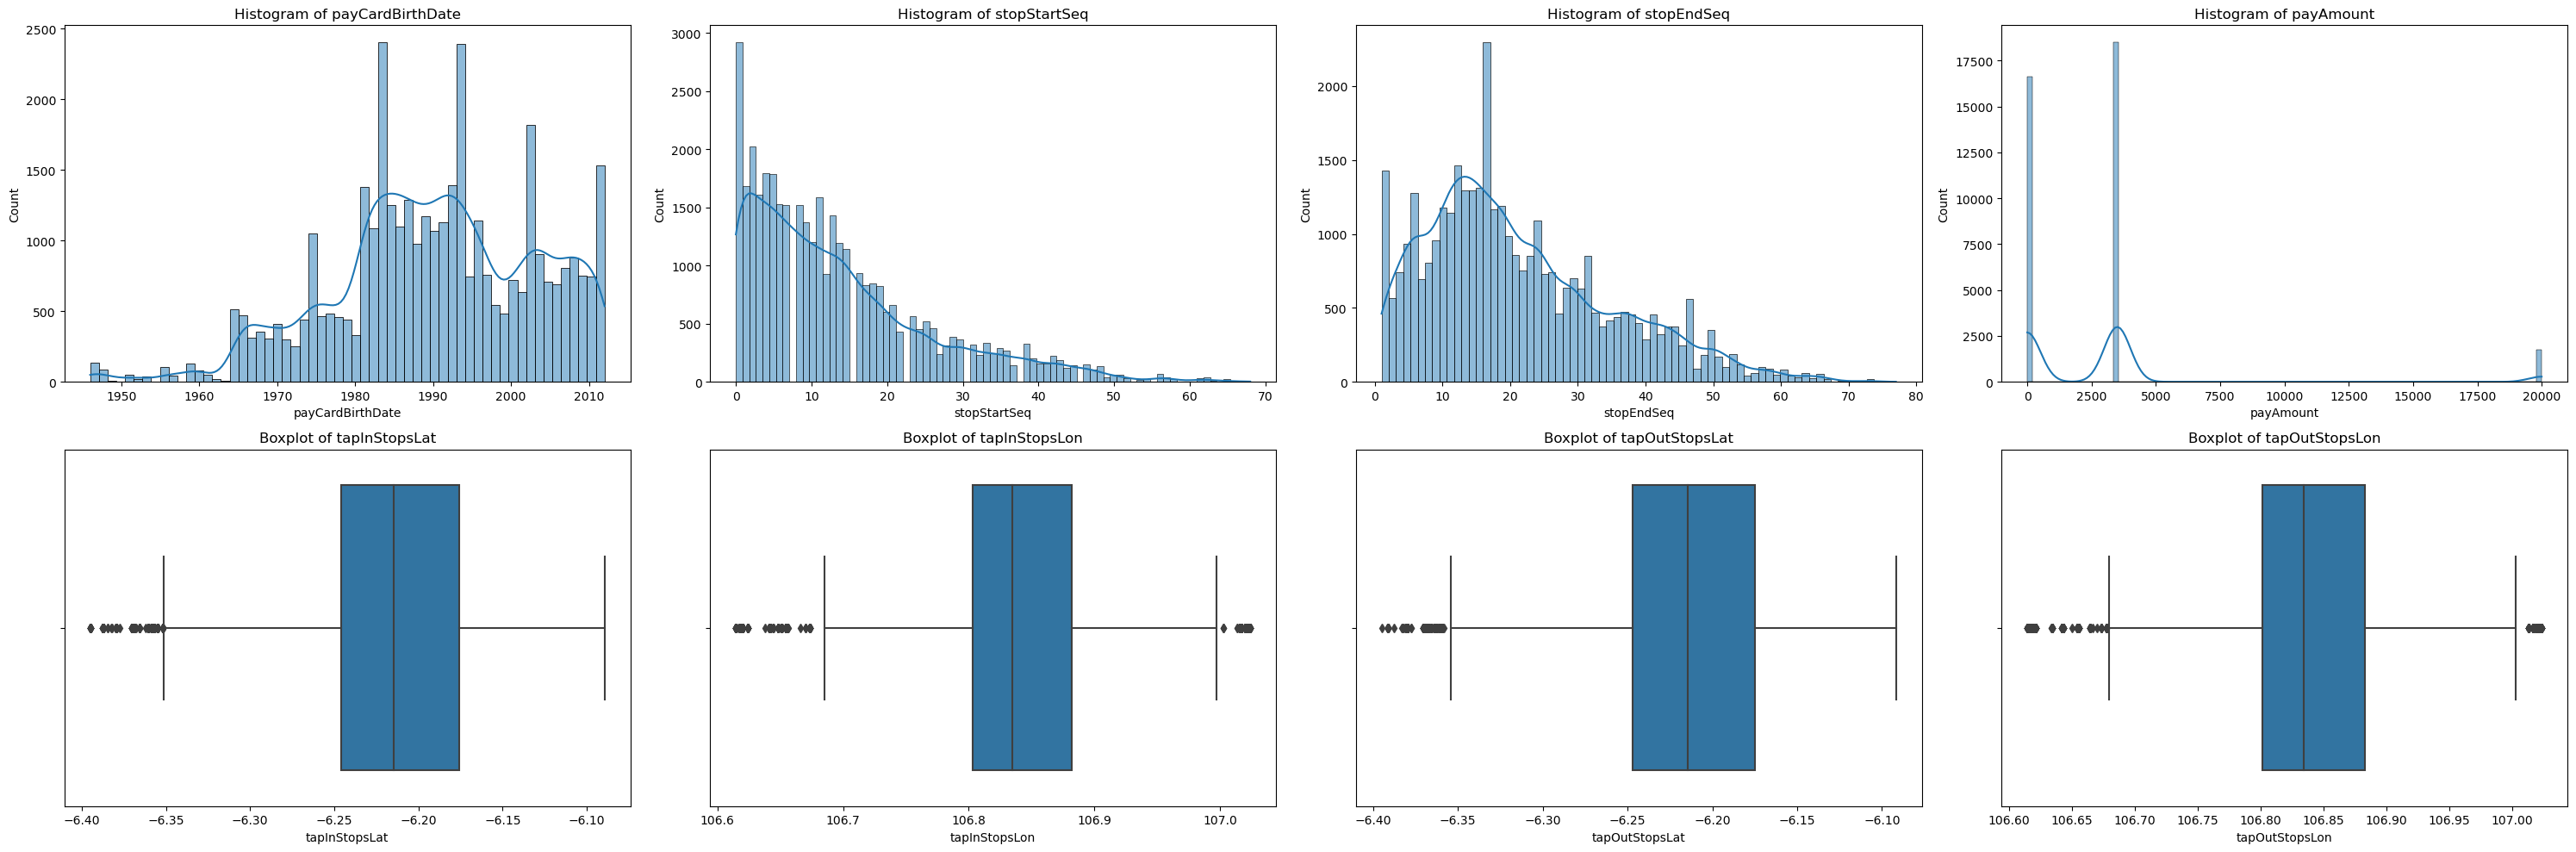

In [39]:
# Define kolom continuous dan discrete
continuous_columns = ['payCardBirthDate', 'stopStartSeq', 'stopEndSeq', 'payAmount']
discrete_columns = ['tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon']

# Set up the matplotlib figure
fig, axs = plt.subplots(2, 4, figsize=(30, 10))  # 2 baris, 4 kolom

# Plot histogram untuk numeric continuous
for i, col in enumerate(continuous_columns):
    sns.histplot(numeric[col], kde=True, ax=axs[0, i])
    axs[0, i].set_title(f'Histogram of {col}')

# Plot boxplot untuk numeric discrete
for i, col in enumerate(discrete_columns):
    sns.boxplot(x=numeric[col], ax=axs[1, i])
    axs[1, i].set_title(f'Boxplot of {col}')

# Menyesuaikan tata letak dan menampilkan plot
plt.tight_layout()
plt.show()


**Histogram untuk Data Numeric Continuous**:

- `payCashBirthDate`: Histogram menunjukkan distribusi yang menyerupai distribusi normal, meskipun sedikit condong ke kanan.
- `stopStartSeq`: Histogram memiliki bentuk yang cenderung normal.
- `stopEndSeq`: Histogram tampak bimodal dengan dua puncak yang berbeda, menunjukkan distribusi yang tidak normal.
- `payAmount`: Histogram memiliki bentuk yang menyerupai distribusi normal, meskipun sedikit condong ke kiri.

**Boxplot untuk Data Numeric Discrete**:
- `tapInStopsLat`: Boxplot menunjukkan distribusi yang sangat condong ke kiri dan tidak normal dengan adanya pencilan yang ekstrem.
- `tapInStopsLon`: Boxplot memiliki bentuk yang menyerupai distribusi normal namun sedikit condong ke kanan dengan beberapa pencilan.
- `tapOutStopsLat`: Boxplot menunjukkan distribusi yang sangat condong ke kiri dan tidak normal dengan adanya pencilan yang ekstrem.
- `tapOutStopsLon`: Boxplot memiliki bentuk yang menyerupai distribusi normal namun sedikit condong ke kanan dengan beberapa pencilan.

**Kesimpulan**:
- Variabel `payCashBirthDate`, `stopStartSeq`, dan `payAmount` cenderung memiliki distribusi normal berdasarkan histogram.
- Variabel `stopEndSeq` tidak memiliki distribusi normal karena histogramnya bimodal.
- Variabel `tapInStopsLat` dan `tapOutStopsLat` tidak memiliki distribusi normal berdasarkan boxplot yang sangat condong ke kiri.
- Variabel `tapInStopsLon` dan `tapOutStopsLon` mungkin mendekati distribusi normal, meskipun ada sedikit condong dan pencilan menurut boxplot.

### Outliers

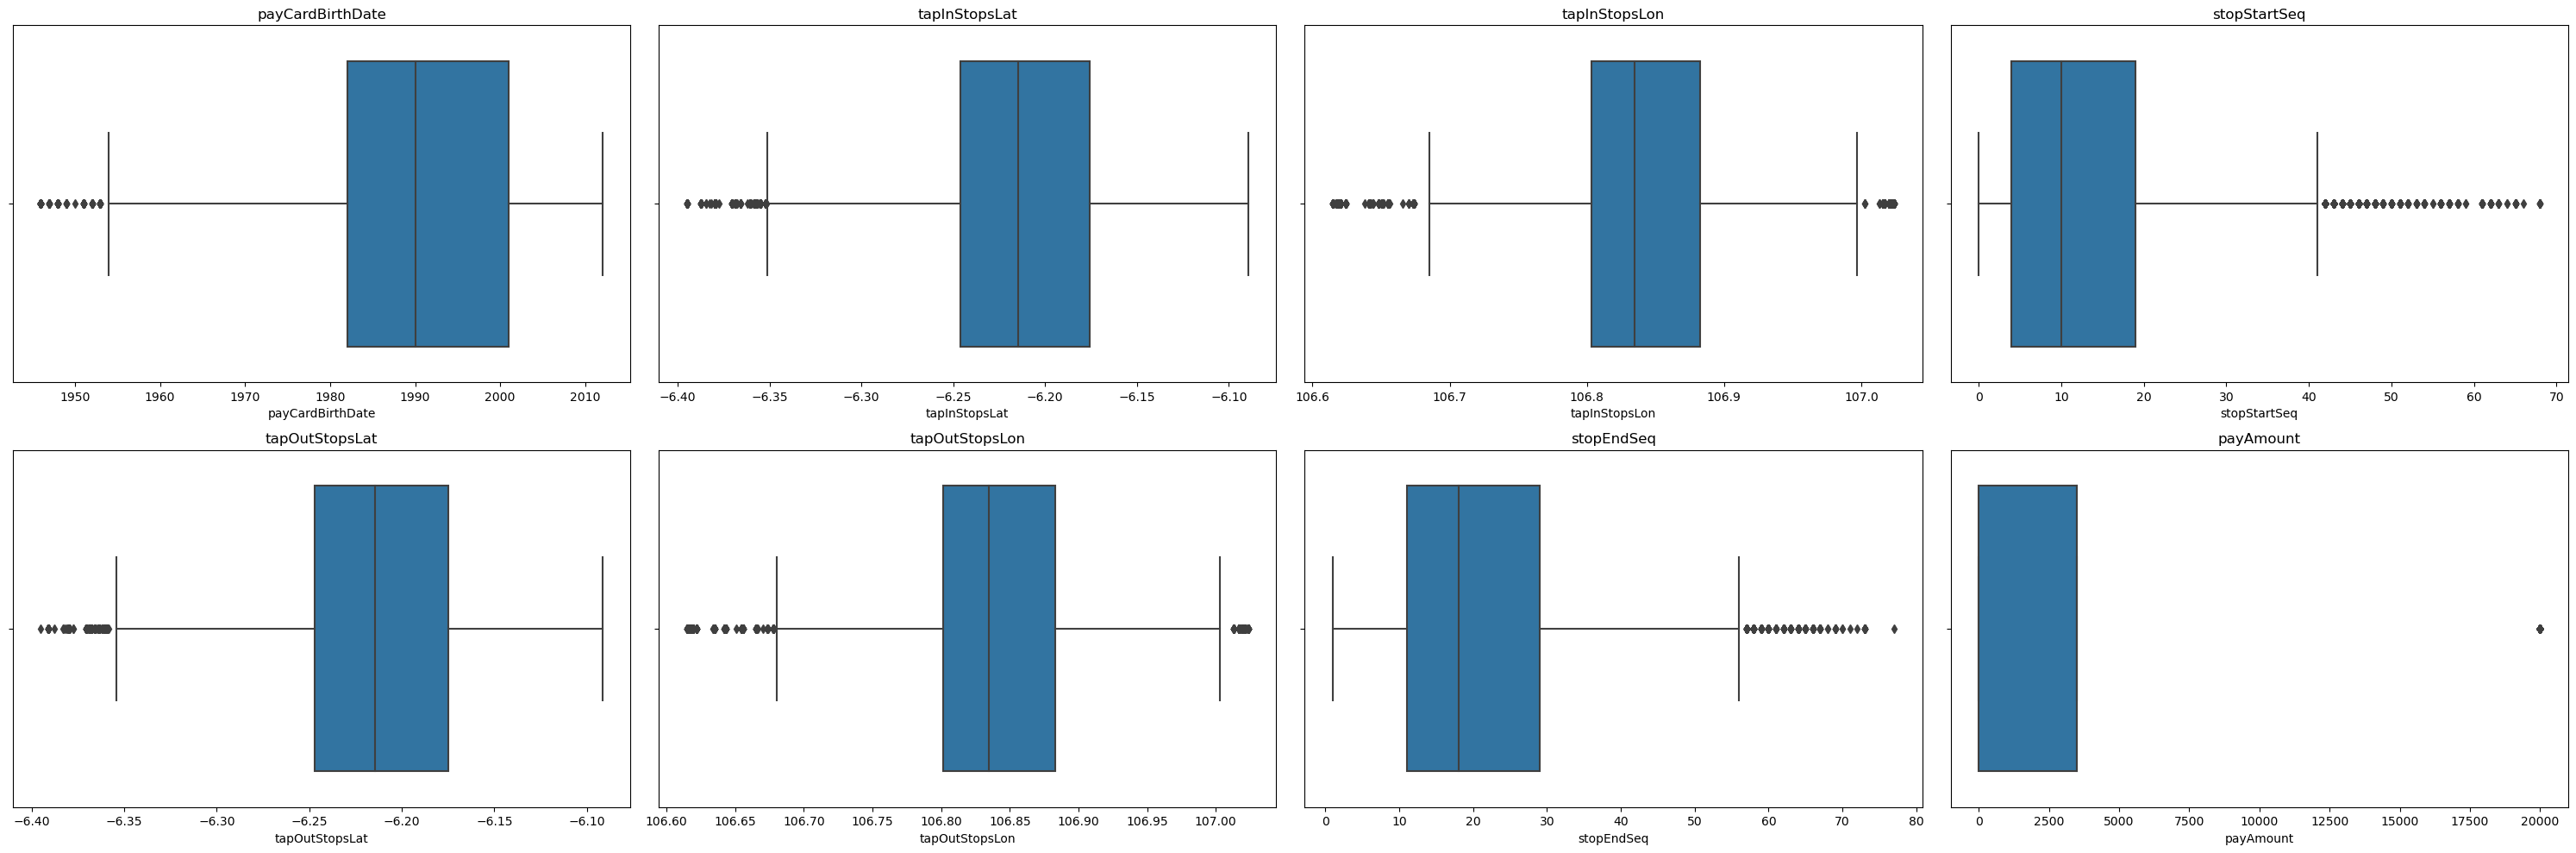

In [40]:
# Menyiapkan gambar matplotlib dengan ukuran tertentu (horizontal, vertikal)
fig = plt.figure(figsize=(30,10))

# Menginisialisasi variabel hitungan
count = 0

# Mengulangi setiap kolom dalam data numerik
for kolom in numeric.columns:
    # Menambahkan hitungan
    count += 1
    
    # Membuat subplot, dengan 2 baris dan 4 kolom
    plt.subplot(2,4,count)
    
    # Membuat boxplot untuk kolom saat ini
    sns.boxplot(numeric, x = kolom)
    
    # Mengatur judul subplot dengan nama kolom
    plt.title(f'{kolom}')
    
# Menyesuaikan tata letak untuk mencegah tumpang tindih dan menampilkan plot
plt.tight_layout()
plt.show()


In [41]:
for column in numeric.columns:
    # Menghitung kuartil pertama (Q1)
    q1 = df[column].describe().loc['25%']
    
    # Menghitung kuartil ketiga (Q3)
    q3 = df[column].describe().loc['75%']
    
    # Menghitung Rentang Interkuartil (IQR)
    iqr = q3 - q1
    
    # Menghitung batas bawah
    lower_bound = q1 - 1.5 * iqr
    
    # Menghitung batas atas
    upper_bound = q3 + 1.5 * iqr 

    # Menghitung jumlah outliers
    jumlah_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    
    # Menampilkan hasil jumlah outliers
    print(f"`{column}` memiliki {jumlah_outliers} outliers")


`payCardBirthDate` memiliki 340 outliers
`tapInStopsLat` memiliki 411 outliers
`tapInStopsLon` memiliki 558 outliers
`stopStartSeq` memiliki 1543 outliers
`tapOutStopsLat` memiliki 359 outliers
`tapOutStopsLon` memiliki 449 outliers
`stopEndSeq` memiliki 583 outliers
`payAmount` memiliki 1742 outliers


1. `payCashBirthDate`:
    - **Outliers**: 340 nilai yang dianggap sebagai outliers mungkin mewakili kelompok usia yang sangat muda atau sangat tua.
    - **Relevansi**: Karena tanggal lahir yang valid dapat bervariasi secara luas, nilai-nilai ini mungkin akurat dan seharusnya tidak dianggap sebagai kesalahan kecuali ada bukti kuat yang menunjukkan kesalahan entri data.

2. `tapInStopLat`:
    - **Outliers**: 411 outliers dalam lintang berhenti mungkin menunjukkan berhenti yang jarang digunakan atau posisi geografis ekstrem.
    - **Relevansi**: Jika berhenti ini valid dan layanan operasional mencakup area geografis yang luas, maka outliers ini relevan dan mencerminkan variasi lokasi yang sebenarnya.

3. `tapInStopLon`:
    - **Outliers**: 558 outliers dalam bujur berhenti yang mirip dengan lintang mungkin merepresentasikan variasi geografis.
    - **Relevansi**: Seperti lintang, jika berhenti ini ada dan valid, mereka relevan untuk data operasional.

4. `stopStartSeq`:
    - **Outliers**: 1543 outliers dapat menunjukkan rute dengan jumlah berhenti yang signifikan lebih banyak atau lebih sedikit dari rute-rute kebanyakan.
    - **Relevansi**: Ini mungkin mencerminkan keragaman dalam jaringan layanan, seperti rute yang sangat panjang atau pendek, dan mungkin penting untuk dipertahankan dalam analisis rute.

5. `tapOutStopLat`:
    - **Outliers**: 359 outliers dapat menunjukkan berhenti dengan frekuensi penggunaan rendah atau lokasi yang jarang.
    - **Relevansi**: Nilai-nilai ini penting jika mereka mencerminkan aspek tertentu dari jaringan layanan yang lebih besar.

6. `tapOutStopLon`:
    - **Outliers**: 449 outliers mungkin menunjukkan berhenti yang terletak di luar pusat kota atau daerah dengan lalu lintas yang lebih rendah.
    - **Relevansi**: Seperti lintang, bujur yang valid adalah bagian penting dari data operasional.

7. `stopEndSeq`:
    - **Outliers**: 583 outliers mungkin mencerminkan rute dengan jumlah berhenti yang sangat berbeda.
    - **Relevansi**: Jika berhenti akhir yang diwakili oleh outliers ini adalah bagian dari rute yang valid, mereka memberikan wawasan tentang pola perjalanan dan seharusnya tidak dihapus.

8. `payAmount`:
    - **Outliers**: 1742 outliers dengan nilai pembayaran hingga 20.000 mungkin mewakili pembelian tiket layanan premium atau pembelian dalam jumlah besar.
    - **Relevansi**: Outliers ini relevan karena mereka mewakili layanan premium seperti Royaltrans dengan tarif Rp. 20.000. Mereka harus dipertahankan dalam dataset karena mereka mencerminkan struktur tarif yang valid.

### Korelasi

In [42]:
# Menghitung matriks korelasi menggunakan metode 'spearman' untuk data numerik
numeric_corr_spearman = numeric.corr(method='spearman') # ketika tidak normal, kalau normal = pearson
numeric_corr_spearman

,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
payCardBirthDate,1.000000,0.053390,-0.052694,-0.024925,0.033952,-0.044056,-0.023479,0.074565
tapInStopsLat,0.053390,1.000000,0.023666,-0.007995,0.910567,0.032871,-0.020717,-0.130678
tapInStopsLon,-0.052694,0.023666,1.000000,0.052814,0.032628,0.914414,0.089086,-0.295555
stopStartSeq,-0.024925,-0.007995,0.052814,1.000000,-0.024018,0.045309,0.791717,-0.264551
tapOutStopsLat,0.033952,0.910567,0.032628,-0.024018,1.000000,0.013989,-0.027788,-0.129890
tapOutStopsLon,-0.044056,0.032871,0.914414,0.045309,0.013989,1.000000,0.081366,-0.286594
stopEndSeq,-0.023479,-0.020717,0.089086,0.791717,-0.027788,0.081366,1.000000,-0.386481
payAmount,0.074565,-0.130678,-0.295555,-0.264551,-0.129890,-0.286594,-0.386481,1.000000


<Axes: >

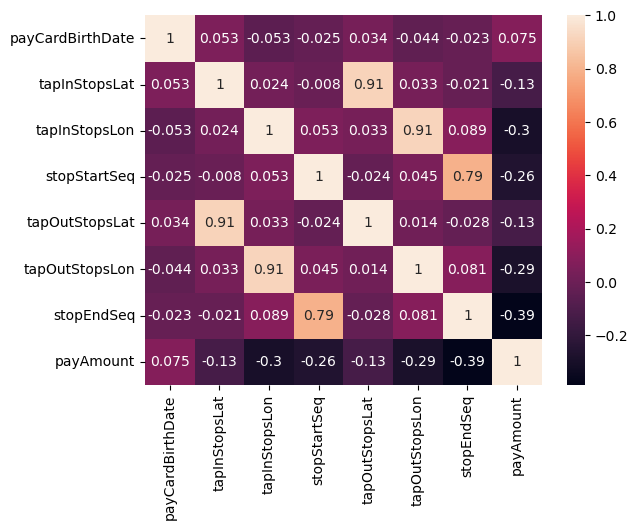

In [43]:
# Membuat heatmap korelasi menggunakan metode 'spearman' dan menampilkan anotasi
sns.heatmap(numeric.corr(method='spearman'), annot=True)

1. **`payCashBirthDate`**: Korelasi variabel ini dengan variabel lain sangat lemah, menunjukkan bahwa usia pemegang kartu tidak memiliki hubungan signifikan dengan aspek geospasial atau keuangan dari transaksi yang tercatat.

2. **`tapInStopLat` dan `tapOutStopLat`**: Dua variabel ini memiliki korelasi yang sangat tinggi (0.91), menunjukkan bahwa lokasi geografis tempat penumpang naik dan turun cenderung sangat dekat satu sama lain, atau bahkan identik dalam banyak kasus.

3. **`tapInStopLon` dan `tapOutStopLon`**: Serupa dengan lintang, terdapat korelasi yang sangat tinggi (0.91) antara lokasi bujur tempat penumpang naik dan turun, menunjukkan bahwa sebagian besar penumpang naik dan turun dalam area yang relatif terbatas.

4. **`stopStartSeq` dan `stopEndSeq`**: Hubungan yang cukup signifikan (0.79) antara urutan berhenti awal dan akhir menunjukkan adanya pola dalam perjalanan penumpang, di mana urutan berhenti awal dan akhir seringkali berkaitan—misalnya, penumpang sering melakukan perjalanan dari beberapa berhenti awal ke beberapa berhenti akhir tertentu.

5. **`payAmount`**: Terdapat korelasi negatif sedang dengan `tapInStopLon` (-0.3), `tapOutStopLon` (-0.29), dan `stopEndSeq` (-0.39). Ini dapat menunjukkan bahwa semakin jauh lokasi tap-in atau tap-out, atau semakin tinggi urutan berhenti akhir, semakin rendah jumlah pembayaran—mungkin mencerminkan struktur tarif yang berbeda berdasarkan jarak perjalanan atau beberapa promosi yang diterapkan pada beberapa rute.

Korelasi yang rendah atau negatif tidak selalu berarti tidak ada hubungan antara variabel tersebut. Mungkin ada hubungan non-linear atau variabel lain yang memoderasi hubungan ini yang tidak dapat ditangkap melalui korelasi Spearman. Oleh karena itu, setiap wawasan yang diperoleh dari analisis korelasi ini harus dipertimbangkan dengan hati-hati dan dalam konteks yang lebih luas dari data dan operasi sistem transportasi publik.

## Categoric Data Statistics

In [44]:
# Memilih kolom-kolom kategorikal dari DataFrame
categoric = df.select_dtypes(exclude='number')
categoric

,transID,payCardID,payCardBank,payCardName,payCardSex,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,2023-04-03 05:21:44,P00253,Tegalan,2023-04-03 06:00:53
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,2023-04-03 06:40:01
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,2023-04-03 06:50:55
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,2023-04-03 05:44:51,B03090P,Raya Penggilingan,2023-04-03 06:28:16
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,2023-04-03 06:17:35,P00098,Kali Besar Barat,2023-04-03 06:57:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,2023-04-21 18:18:37,P00228,SMK 57,2023-04-21 19:55:49
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,2023-04-18 21:52:31,P00179,Pinang Ranti,2023-04-18 22:28:22
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,2023-04-04 10:29:47,B00226P,Buperta Cibubur,2023-04-04 13:27:25
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,2023-04-15 19:59:26,B01787P,JPO Blok G,2023-04-15 20:27:50


### Count Values

In [45]:
# Menghitung jumlah nilai unik dalam setiap kolom kategorikal
categoric_nunique = categoric.nunique()
categoric_nunique

transID            37900
payCardID           2000
payCardBank            6
payCardName         1993
payCardSex             2
corridorID           221
corridorName         216
direction              2
tapInStops          2570
tapInStopsName      2602
tapInTime          37079
tapOutStops         2230
tapOutStopsName     2248
tapOutTime         35908
dtype: int64

1. **`transID`**: Terdapat 37.900 nilai unik yang menunjukkan setiap transaksi memiliki ID unik, sesuai yang diharapkan untuk setiap transaksi individu.

2. **`payCardID`**: Terdapat 2.000 ID kartu pembayaran unik yang digunakan, yang dapat menunjukkan jumlah pengguna atau kartu yang terlibat dalam dataset.

3. **`payCardBank`**: Hanya terdapat 6 bank berbeda, menunjukkan bahwa hanya ada beberapa bank yang berafiliasi dengan sistem pembayaran kartu dalam dataset.

4. **`payCardName`**: Dengan 1.993 nama unik, ini menunjukkan variasi pengguna yang menggunakan sistem transportasi, meskipun beberapa nama mungkin milik pengguna yang sama (misalnya, jika nama ditulis dengan variasi).

5. **`payCardSex`**: Dua jenis kelamin yang tercatat, mencerminkan data jenis kelamin biner untuk pengguna.

6. **`corridorID`**: Terdapat 221 ID koridor yang berbeda, menunjukkan jumlah rute atau koridor yang dilayani oleh Transjakarta dalam dataset ini.

7. **`corridorName`**: Dengan 216 nama koridor unik, hampir sejajar dengan jumlah `corridorID`, yang mungkin menunjukkan beberapa koridor memiliki lebih dari satu nama atau ejaan yang berbeda.

8. **`direction`**: Dua arah yang tercatat dalam data, dengan asumsi "0" untuk pergi dan "1" untuk kembali, atau sebaliknya.

9. **`tapInStops`** dan **`tapInStopsName`**: Jumlah berhenti unik tempat penumpang naik adalah lebih dari 2.500, sedikit variasi antara ID berhenti dan nama yang menunjukkan hampir setiap berhenti memiliki nama uniknya sendiri.

10. **`tapInTime`** dan **`tapOutTime`**: Jumlah waktu tap-in dan tap-out yang unik sangat bervariasi, menunjukkan variasi yang luas dalam waktu transaksi selama periode dataset.

11. **`tapOutStops`** dan **`tapOutStopsName`**: Jumlah berhenti unik tempat penumpang turun juga lebih dari 2.200, mendekati jumlah berhenti naik.

Ini memberikan gambaran tentang variasi dan kompleksitas dalam data. Dengan jumlah besar ID transaksi, ID kartu, waktu tap masuk/keluar, dan variasi koridor, kita dapat mengasumsikan bahwa dataset ini mencakup banyak aspek dari operasi layanan transportasi. Ketersediaan data ini memungkinkan analisis mendalam pola penggunaan transportasi, preferensi pengguna, dan optimasi rute.

### Modus 

In [46]:
# Menampilkan ringkasan statistik deskriptif untuk kolom-kolom kategorikal
categoric_describe = categoric.describe(include='object')
categoric_describe

,transID,payCardID,payCardBank,payCardName,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName
count,37900,37900,37900,37900,36643,35970,36687,37900,35611,36556
unique,37900,2000,6,1993,221,216,2570,2602,2230,2248
top,EIIW227B8L34VB,180062659848800,dki,Fathonah Saefullah,1T,Cibubur - Balai Kota,P00170,Penjaringan,P00016,BKN
freq,1,40,18743,80,400,391,236,243,306,316


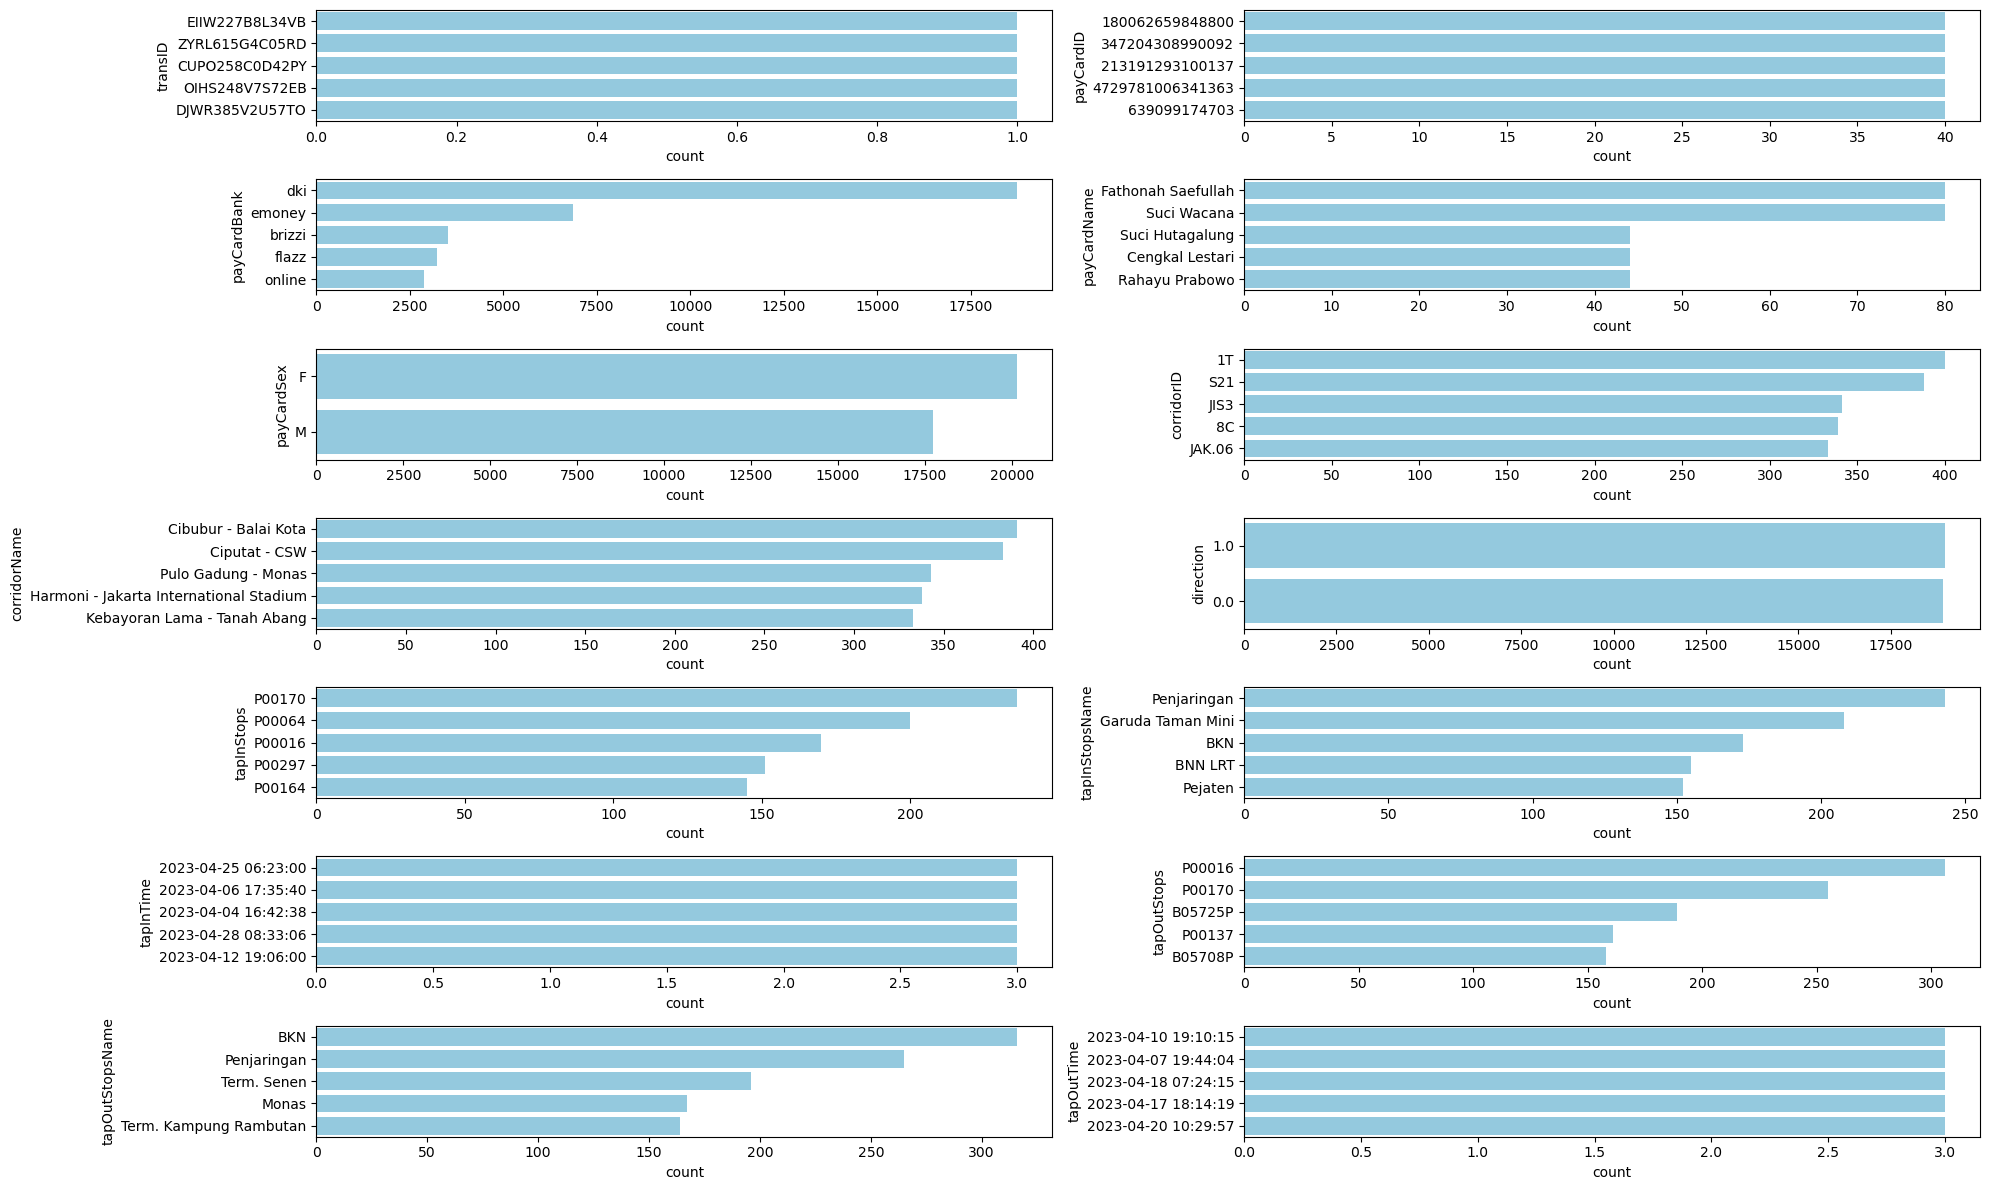

In [47]:
# Inisialisasi variabel hitungan
count = 0

# Membuat gambar matplotlib dengan ukuran tertentu
fig = plt.figure(figsize=(20,12))

# Iterasi melalui setiap kolom dalam kolom-kolom kategorikal
for column in categoric.columns:
    # Menambahkan hitungan
    count += 1
    
    # Membuat subplot dengan 7 baris dan 2 kolom
    plt.subplot(7,2,count)
    
    # Membuat countplot untuk kolom saat ini dengan urutan berdasarkan nilai terbanyak (5 teratas)
    sns.countplot(y=column, data=categoric, order=categoric[column].value_counts().sort_values(ascending=False).head(5).index, color='skyblue')

# Menyesuaikan tata letak untuk mencegah tumpang tindih dan menampilkan plot
plt.tight_layout()
plt.show()

Berikut adalah penjelasan untuk setiap field berdasarkan visualisasi data kategorikal di atas:

1. **`transID`**: Setiap `transID` adalah unik, yang berarti setiap baris merepresentasikan transaksi yang berbeda.

2. **`payCardID`**: Ada 2000 `payCardID` yang unik, dengan beberapa ID yang muncul lebih sering, menandakan beberapa pengguna lebih sering menggunakan layanan.

3. **`payCardBank`**: Enam bank yang berbeda berkolaborasi dengan layanan ini, dengan bank `dki` sebagai yang paling dominan. Ini mengindikasikan mayoritas pengguna Transjakarta menggunakan bank `dki` untuk transaksi mereka.

4. **`payCardName`**: Terdapat banyak nama yang unik, tapi beberapa muncul lebih sering, yang bisa menunjukkan beberapa pengguna menggunakan layanan lebih sering, atau adanya variasi dalam entri nama.

5. **`payCardSex`**: Terdapat dua jenis kelamin yang dinyatakan, dan distribusi menunjukkan proporsi penggunaan berdasarkan jenis kelamin.

6. **`corridorID`** dan **`corridorName`**: Dengan 221 `corridorID` dan 216 `corridorName` yang unik, data menunjukkan beberapa koridor lebih banyak digunakan daripada yang lain, mungkin mencerminkan volume trafik atau popularitas rute tertentu.

7. **`direction`**: Dua nilai arah menunjukkan bahwa distribusi perjalanan hampir seragam antara dua arah yang ditawarkan.

8. **`tapInStops`** dan **`tapOutStops`**: Lebih dari 2500 halte naik dan lebih dari 2200 halte turun yang unik, dengan beberapa halte yang jauh lebih sering digunakan. Ini dapat menunjukkan area-area dengan volume penumpang yang tinggi.

9. **`tapInStopsName`** dan **`tapOutStopsName`**: Nama-nama halte menunjukkan lokasi yang paling sering digunakan untuk naik dan turun, dengan beberapa halte seperti "Penjaringan" dan "BKN" yang muncul sebagai lokasi utama.

10. **`tapInTime`** dan **`tapOutTime`**: Waktu naik dan turun yang paling sering mencerminkan jam-jam sibuk dalam penggunaan layanan transportasi.

Setiap variabel memberikan pandangan mendalam tentang kebiasaan perjalanan penumpang. Misalnya, data menunjukkan ada beberapa pengguna yang sangat sering menggunakan layanan, beberapa halte yang sangat sibuk, dan pola waktu perjalanan yang bisa berkaitan dengan jam kerja. Informasi ini sangat berguna untuk perencanaan rute, penjadwalan, dan strategi pemasaran bagi Transjakarta.

# Data Cleaning

In [48]:
# Melakukan salinan DataFrame untuk membersihkan data
df_clean = df.copy() # ini penting agar tidak terlalu jauh kalau ingin mengulang cleaning

## Handling Missing Values

<Axes: >

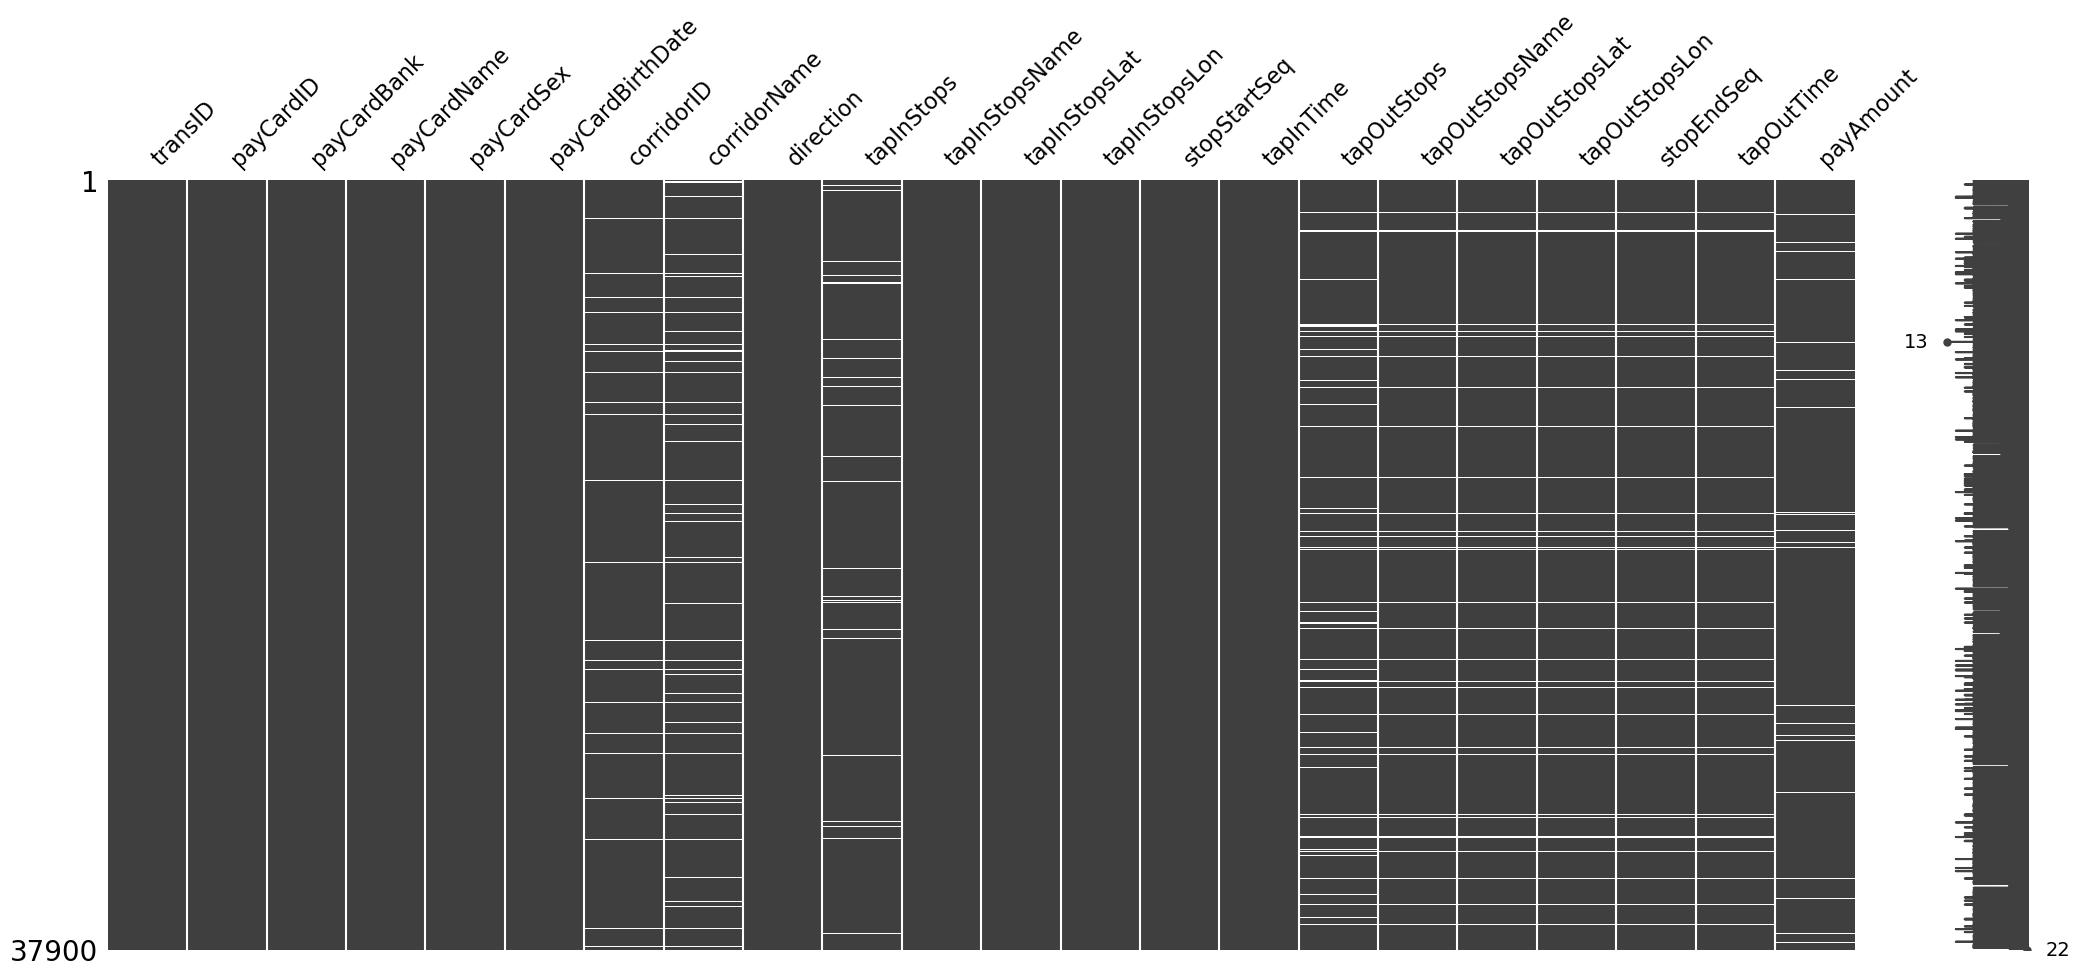

In [49]:
# Memvisualisasikan pola missing values dalam DataFrame
missingno.matrix(df_clean)

In [50]:
# Memunculkan jumlah missing value setiap field
df_clean.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [51]:
# Memilih baris-baris dalam DataFrame yang mengandung setidaknya satu nilai yang hilang
df_missing_values = df_clean[df_clean.isna().any(axis=1)]
df_missing_values

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaT,0.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,...,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,...,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaT,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,...,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0
37882,YMCL988A7J02QF,180074952289665,emoney,Asmadi Setiawan,F,1971,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B01732P,...,106.86825,11,2023-04-30 08:41:09,B01169P,Jln. Jatinegara Timur IV,-6.222457,106.86816,13.0,2023-04-30 10:07:19,NaN
37885,KUXY021D6I25YN,30169751274025,bni,Prasetya Wasita,M,1986,3B,NaN,1.0,B04610P,...,106.72736,2,2023-04-08 10:46:06,B00192P,BSI Cengkareng,-6.147973,106.72781,3.0,2023-04-08 13:06:42,0.0
37887,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,...,106.88830,5,2023-04-04 14:52:31,NaN,Pramuka LIA,-6.192238,106.86858,9.0,2023-04-04 15:38:58,3500.0


Kita akan menangani nilai-nilai yang hilang dengan membedakan dua kategori utama dalam data yang kita miliki:

- **Check In Bus**: Ketika penumpang naik bus dan melakukan tap in, sistem pencatatan akan mengaktivasi dan mengisi field yang berkaitan dengan proses masuk, termasuk `transID`, `payCardID`, `payCardBank`, `payCardName`, `payCardSex`, `payCardBirthDate`, `corridorID`, `corridorName`, `direction`, `tapInStops`, `tapInStopsName`, `tapInStopsLat`, `tapInStopsLon`, `stopStartSeq`, dan `tapInTime`. Field-field ini adalah kunci untuk mengidentifikasi penumpang serta detail perjalanan mereka saat memasuki bus.

- **Check Out Bus**: Serupa dengan proses check-in, ketika penumpang turun dari bus dan melakukan tap out, sistem akan merekam kejadian tersebut dengan mengisi field yang berkaitan dengan proses keluar, termasuk `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount`. Field-field ini memberikan informasi penting mengenai titik akhir perjalanan penumpang dan jumlah tarif yang dibayarkan.

Dengan mendefinisikan dua kategori ini, kita dapat lebih terfokus dalam mengidentifikasi dan menangani nilai-nilai yang hilang dalam dataset, yang akan meningkatkan keakuratan dan integritas analisis yang kita lakukan. Data check-in membantu kita memahami titik mulai perjalanan penumpang, sementara data check-out memberikan insight mengenai konklusi perjalanan mereka dan tarif yang dikeluarkan.

### Check In Bus

In [52]:
# Menyiapkan dataframe untuk pembuatan pemetaan
check_in_mapping_columns = ['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'corridorID', 'corridorName', 'tapInStops']
check_in_df_mapping = df_clean.dropna(subset=['corridorID', 'corridorName', 'tapInStops']).drop_duplicates(subset=check_in_mapping_columns)

# Membuat pemetaan
check_in_mapping = check_in_df_mapping.groupby(['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq']).agg({
    'corridorID': 'first',
    'corridorName': 'first',
    'tapInStops': 'first'
}).reset_index()

# Fungsi untuk menerapkan pemetaan untuk pengisian nilai yang hilang
def apply_mapping(row, check_in_mapping_df, target):
    if pd.isna(row[target]):
        key = (row['tapInStopsName'], row['tapInStopsLat'], row['tapInStopsLon'], row['stopStartSeq'])
        value = check_in_mapping_df.loc[
            (check_in_mapping_df['tapInStopsName'] == key[0]) & 
            (check_in_mapping_df['tapInStopsLat'] == key[1]) & 
            (check_in_mapping_df['tapInStopsLon'] == key[2]) & 
            (check_in_mapping_df['stopStartSeq'] == key[3]), target
        ]
        return value.iloc[0] if not value.empty else None
    else:
        return row[target]

# Menerapkan pemetaan untuk mengisi nilai yang hilang
for target in ['corridorID', 'corridorName', 'tapInStops']:
    df_clean[target] = df_clean.apply(apply_mapping, axis=1, check_in_mapping_df=check_in_mapping, target=target)

# Menghapus record dengan nilai yang hilang yang tidak terpecahkan
df_clean = df_clean.dropna(subset=['corridorID', 'corridorName', 'tapInStops'])

# Mencetak hasilnya
print(f"Original dataset records: {df.shape[0]}")
print(f"Final cleaned dataset records: {df_clean.shape[0]}")
print(f"Records removed: {df.shape[0] - df_clean.shape[0]}")


Original dataset records: 37900
Final cleaned dataset records: 37761
Records removed: 139


Dalam usaha kita untuk membersihkan data 'Check In Bus' pada dataset Transjakarta, kita telah menerapkan beberapa langkah metodis yang penting untuk memastikan integritas data yang berkaitan dengan titik-titik masuk penumpang. Berikut adalah narasi yang terperinci dari proses pembersihan data:

Pertama, kita menyiapkan sebuah dataframe yang disesuaikan (`check_in_df_mapping`) dengan memfilter hanya entri yang mengandung data lengkap dan esensial untuk proses check-in. Ini melibatkan penghapusan semua entri yang kekurangan informasi krusial seperti `corridorID`, `corridorName`, dan `tapInStops`, serta menghilangkan duplikasi yang dapat mempengaruhi keakuratan dataset kita. Langkah ini penting untuk memastikan bahwa setiap entri yang kita gunakan dalam pemetaan check-in adalah representasi yang valid dari pengalaman nyata penumpang saat memulai perjalanan mereka.

Kemudian, kita menyusun pemetaan (`check_in_mapping`) yang menyatukan data mengenai nama halte, lokasi geografis, urutan halte dalam koridor, dan detail koridor. Data ini dikonsolidasikan sedemikian rupa sehingga setiap kombinasi lokasi dan urutan halte dikaitkan dengan informasi `corridorID`, `corridorName`, dan `tapInStops` yang tepat. Pemetaan ini dirancang untuk menjadi alat bantu dalam mengisi kekosongan data dengan informasi yang telah diverifikasi.

Kita juga mengimplementasikan sebuah fungsi (`apply_mapping`) untuk menerapkan pemetaan ini ke dalam dataset utama. Fungsi ini memeriksa dan menggantikan nilai-nilai yang hilang dengan menggunakan informasi yang sesuai dari dataframe pemetaan, berdasarkan kesesuaian lokasi dan urutan halte. Jika tidak ada informasi yang cocok ditemukan, nilai yang hilang dibiarkan tidak terisi, yang menunjukkan bahwa data tambahan diperlukan untuk menyelesaikan entri tersebut.

Setelah kita menerapkan pemetaan ini, kita melangkah lebih lanjut dengan menghapus setiap baris yang masih memiliki nilai yang hilang pasca pemetaan, menandakan bahwa tidak ada informasi yang tersedia untuk mengisi kekosongan tersebut.

Sebagai hasil dari proses pembersihan data ini, dataset asli yang awalnya berjumlah 37.900 entri kini memiliki 37.761 entri yang bersih dan siap untuk dianalisis, dengan 139 entri yang dihapus karena kekurangan informasi. Ini menunjukkan bahwa hampir semua data kita telah berhasil dipertahankan dan disempurnakan untuk analisis lanjutan, dengan hanya sejumlah kecil entri yang harus dihapus untuk menjaga kualitas dan keandalan dataset kita.

Melalui langkah-langkah pembersihan data yang cermat ini, kita telah meningkatkan fondasi untuk analisis yang akan kita lakukan selanjutnya, memastikan bahwa kita beroperasi dengan data yang paling lengkap dan akurat yang tersedia.

### Check Out Bus

In [53]:
# Mengidentifikasi record dengan 'tapOutStops' yang hilang tetapi 'tapOutStopsName', 'tapOutStopsLat', dan 'tapOutStopsLon' tersedia
indices_to_handle = df_clean.index[df_clean['tapOutStops'].isnull() & 
                                   df_clean['tapOutStopsName'].notnull() & 
                                   df_clean['tapOutStopsLat'].notnull() & 
                                   df_clean['tapOutStopsLon'].notnull()]

# Menginisialisasi kolom untuk menandai baris yang akan dihapus
df_clean['to_remove'] = False

for idx in indices_to_handle:
    # Mencoba menemukan nilai 'tapOutStops' yang unik berdasarkan 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon'
    potential_matches = df_clean[
        (df_clean['tapOutStopsName'] == df_clean.at[idx, 'tapOutStopsName']) &
        (df_clean['tapOutStopsLat'] == df_clean.at[idx, 'tapOutStopsLat']) &
        (df_clean['tapOutStopsLon'] == df_clean.at[idx, 'tapOutStopsLon']) &
        df_clean['tapOutStops'].notnull()
    ]['tapOutStops'].unique()

    if len(potential_matches) == 1:  # Ditemukan kecocokan unik
        df_clean.at[idx, 'tapOutStops'] = potential_matches[0]
    else:  # Tidak ada kecocokan unik ditemukan atau lebih dari satu kecocokan ditemukan
        df_clean.at[idx, 'to_remove'] = True

# Menghapus record yang ditandai
df_clean = df_clean[~df_clean['to_remove']].drop(columns=['to_remove'])

# Menghitung dan menampilkan jumlah yang diperbarui
sisa_missing_tapOutStops = df_clean['tapOutStops'].isnull().sum()
ukuran_dataset_bersih = df_clean.shape[0]

sisa_missing_tapOutStops, ukuran_dataset_bersih

(1340, 37743)

Ketika kita menangani pembersihan data untuk 'Check Out Bus', kita berfokus pada rekaman di mana penumpang selesai melakukan perjalanan mereka dan melakukan tap out. Proses ini sangat penting karena menentukan informasi akhir perjalanan, termasuk lokasi penumpang turun dan tarif yang dibayarkan. Namun, ada kalanya kolom `tapOutStops` yang seharusnya mencatat informasi ini ternyata kosong. Untuk mengatasi masalah ini, kita terlebih dahulu mengidentifikasi baris-baris yang tidak memiliki data `tapOutStops` tetapi masih memiliki informasi lengkap untuk `tapOutStopsName`, `tapOutStopsLat`, dan `tapOutStopsLon`.

Setelah mengidentifikasi baris-baris ini, kita mencoba mencocokkan dan mengisi nilai `tapOutStops` yang hilang dengan memanfaatkan kecocokan unik berdasarkan lokasi geografis dan nama halte dari data yang ada. Jika ditemukan hanya satu kecocokan unik, maka itu adalah kesempatan untuk mengisi nilai yang hilang dengan kecocokan tersebut. Namun, jika tidak ada kecocokan yang ditemukan atau ada lebih dari satu kecocokan, maka kita tidak memiliki cukup informasi untuk memverifikasi keakuratan data, dan baris tersebut ditandai untuk dihapus guna menjaga integritas dataset.

Sebagai bagian dari pembersihan, kita menandai baris yang problematis ini dengan menambahkan kolom 'to_remove' dan mengatur nilai menjadi True untuk baris yang tidak bisa kita isikan dengan nilai yang hilang. Ini membantu kita dalam proses pemilihan akhir, di mana kita menghapus semua baris yang ditandai.

Hasil akhir dari langkah-langkah ini adalah dataset yang lebih bersih dengan jumlah entri yang telah diperbarui. Kita bisa melihat dari output kode bahwa masih ada 1.340 entri di mana `tapOutStops` belum diisi, yang menunjukkan bahwa kita mungkin perlu melakukan peninjauan lebih lanjut atau menerima bahwa beberapa data tidak dapat diselamatkan. Sementara itu, ukuran dataset yang telah dibersihkan adalah 37.743 entri, menunjukkan bahwa sebagian besar data telah berhasil dipertahankan dan sekarang siap untuk analisis lebih lanjut. Ini menegaskan upaya kita untuk menjaga dataset kita seakurat mungkin, memastikan bahwa analisis yang akan dilakukan nantinya dapat diandalkan.

In [54]:
# Menghapus record dengan nilai yang hilang dalam kolom-kolom yang ditentukan
df_clean = df_clean.dropna(subset=[
    'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 
    'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount'
])

# Memeriksa ukuran dataset setelah penghapusan
ukuran_dataset_bersih_akhir = df_clean.shape[0]

# Memeriksa nilai-nilai yang hilang yang tersisa untuk setiap kolom
nilai_hilang_tertinggal_setelah_penghapusan = df_clean.isnull().sum().sum()

ukuran_dataset_bersih_akhir, nilai_hilang_tertinggal_setelah_penghapusan


(35436, 0)

Setelah kita menangani nilai-nilai yang hilang untuk 'Check Out Bus' dengan mencoba mengisi sebanyak mungkin data yang bisa diidentifikasi, kita melangkah lebih lanjut dengan menghapus record yang tidak bisa kita lengkapi. Ini adalah langkah penting dalam proses pembersihan data, memastikan bahwa dataset yang kita gunakan untuk analisis selanjutnya bebas dari kekosongan yang bisa mengganggu keakuratan hasil analisis kita. Berikut adalah penjelasan dari proses penghapusan record dan evaluasi dataset setelah penghapusan:

Kita melakukan penghapusan terhadap record yang masih memiliki nilai yang hilang dalam kolom-kolom kritis pasca upaya pengisian sebelumnya. Kolom-kolom ini termasuk `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount`, yang semuanya esensial untuk memahami dinamika perjalanan penumpang dan transaksi finansial yang terjadi. Penghapusan dilakukan dengan metodologi `dropna()`, yang memfilter out baris apa pun yang kehilangan data pada kolom-kolom yang ditentukan, memastikan bahwa dataset yang tersisa hanya berisi entri lengkap.

Setelah proses penghapusan, kita melakukan pengecekan terhadap ukuran dataset yang bersih dan jumlah nilai yang hilang yang masih tersisa. Output dari kode menunjukkan bahwa dataset yang telah dibersihkan berukuran 35.436 entri, dengan total nilai yang hilang tersisa adalah 0. Hal ini menandakan bahwa melalui langkah-langkah pembersihan kita, kita berhasil mengeliminasi semua kekosongan dalam dataset, meninggalkan kita dengan sebuah dataset yang siap untuk dianalisis tanpa hambatan yang disebabkan oleh data yang tidak lengkap.

Proses penghapusan ini merupakan langkah final dalam serangkaian upaya pembersihan data untuk 'Check Out Bus', memastikan bahwa kita memiliki fondasi yang kuat untuk analisis data yang akan datang. Dengan menghilangkan baris-baris yang tidak dapat kita perbaiki, kita meningkatkan integritas dataset secara keseluruhan. Selanjutnya, dengan dataset yang telah dibersihkan secara menyeluruh ini, kita siap untuk menjalankan analisis lebih lanjut, yakin bahwa hasil yang kita peroleh akan didasarkan pada data yang akurat dan lengkap.

### Result After Handling Missing Values

<Axes: >

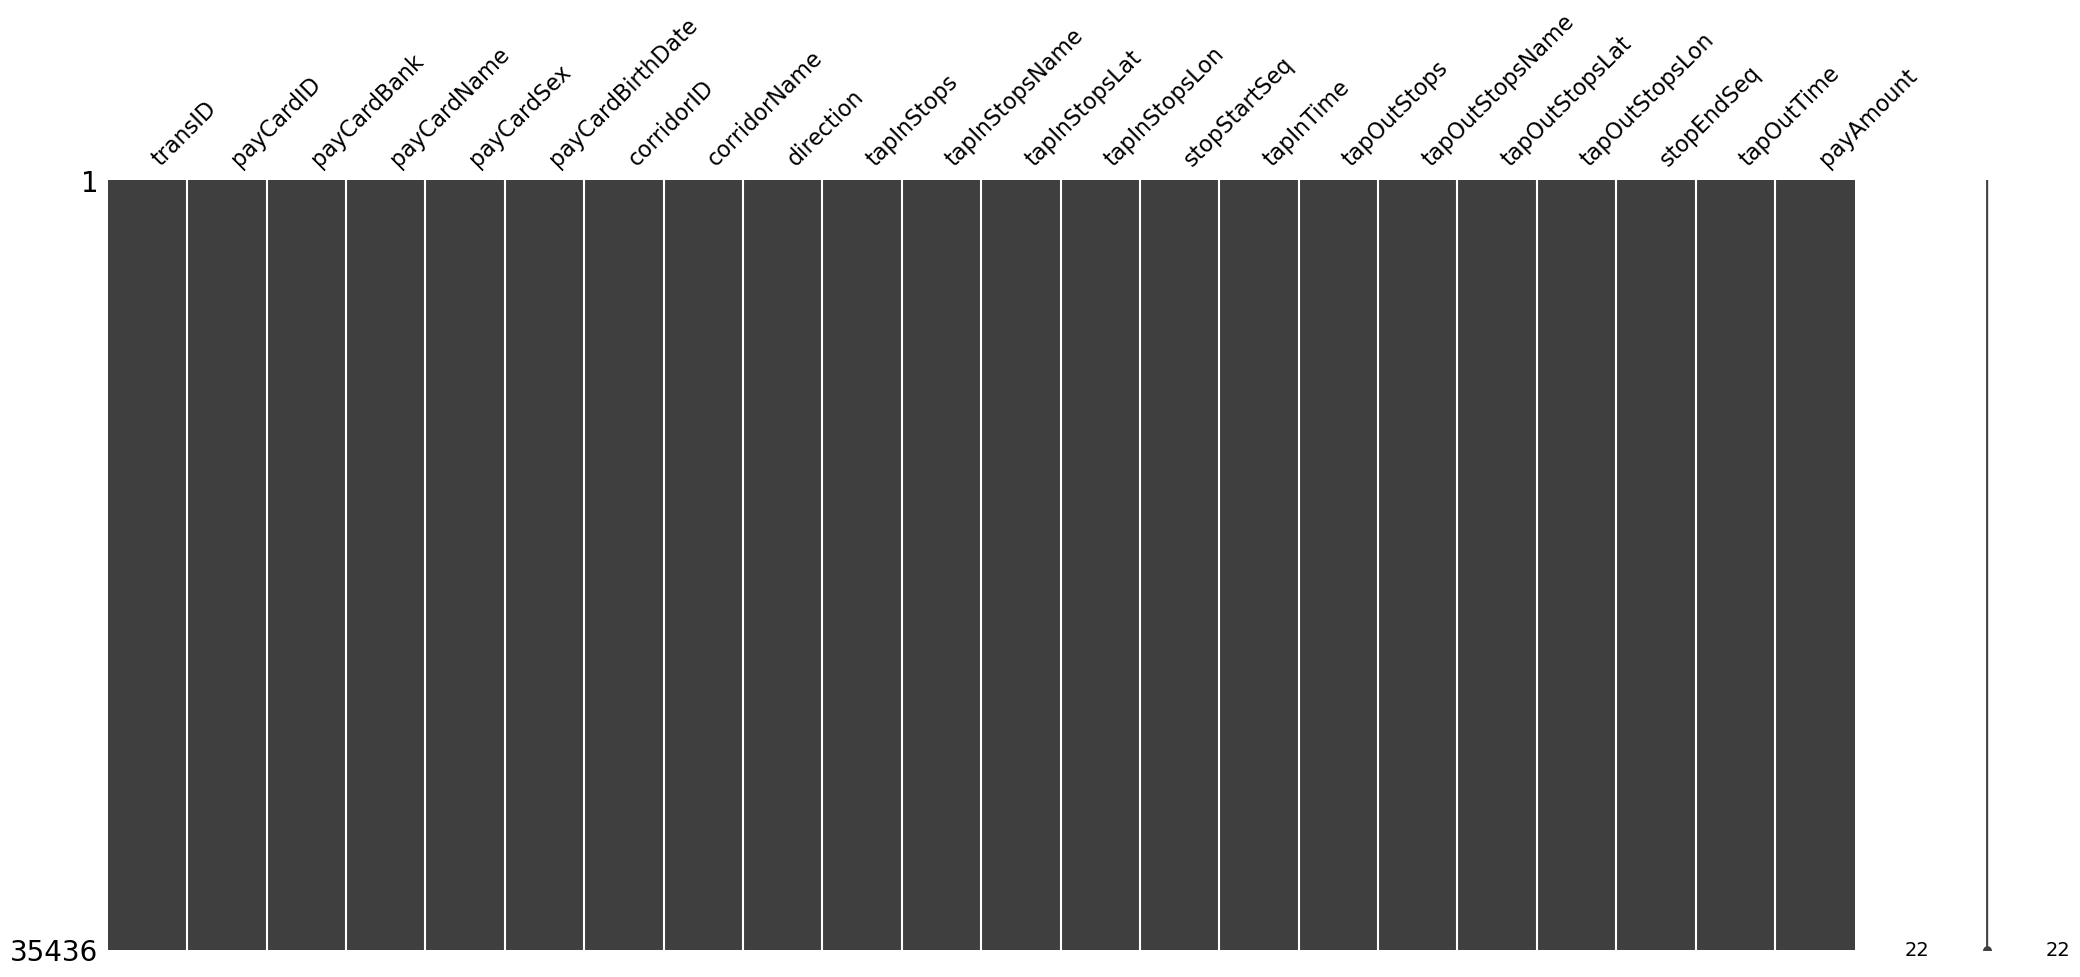

In [55]:
# Memvisualisasikan pola missing values dalam DataFrame setelah handling missing values
missingno.matrix(df_clean)

In [56]:
# Memunculkan jumlah missing value setiap field setelah handling missing values
df_clean.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

## Outliers Handling

In [57]:
# Mengambil field numeric dari dataset
numeric = df_clean.select_dtypes(include='number')
numeric

,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
0,2008,-6.184631,106.84402,7,-6.203101,106.85715,12.0,3500.0
1,1997,-6.228700,106.83302,13,-6.217152,106.81892,21.0,3500.0
2,1992,-6.133132,106.81435,38,-6.133731,106.81475,39.0,3500.0
3,1978,-6.195743,106.93526,23,-6.183068,106.93194,29.0,3500.0
4,1982,-6.149650,106.88900,5,-6.135355,106.81143,15.0,3500.0
...,...,...,...,...,...,...,...,...
37895,2004,-6.196892,106.82309,2,-6.290967,106.82365,13.0,3500.0
37896,1974,-6.290154,106.88116,1,-6.291075,106.88634,2.0,3500.0
37897,1976,-6.216247,106.81676,12,-6.370321,106.89628,14.0,20000.0
37898,1976,-6.188656,106.80954,33,-6.188861,106.81135,34.0,0.0


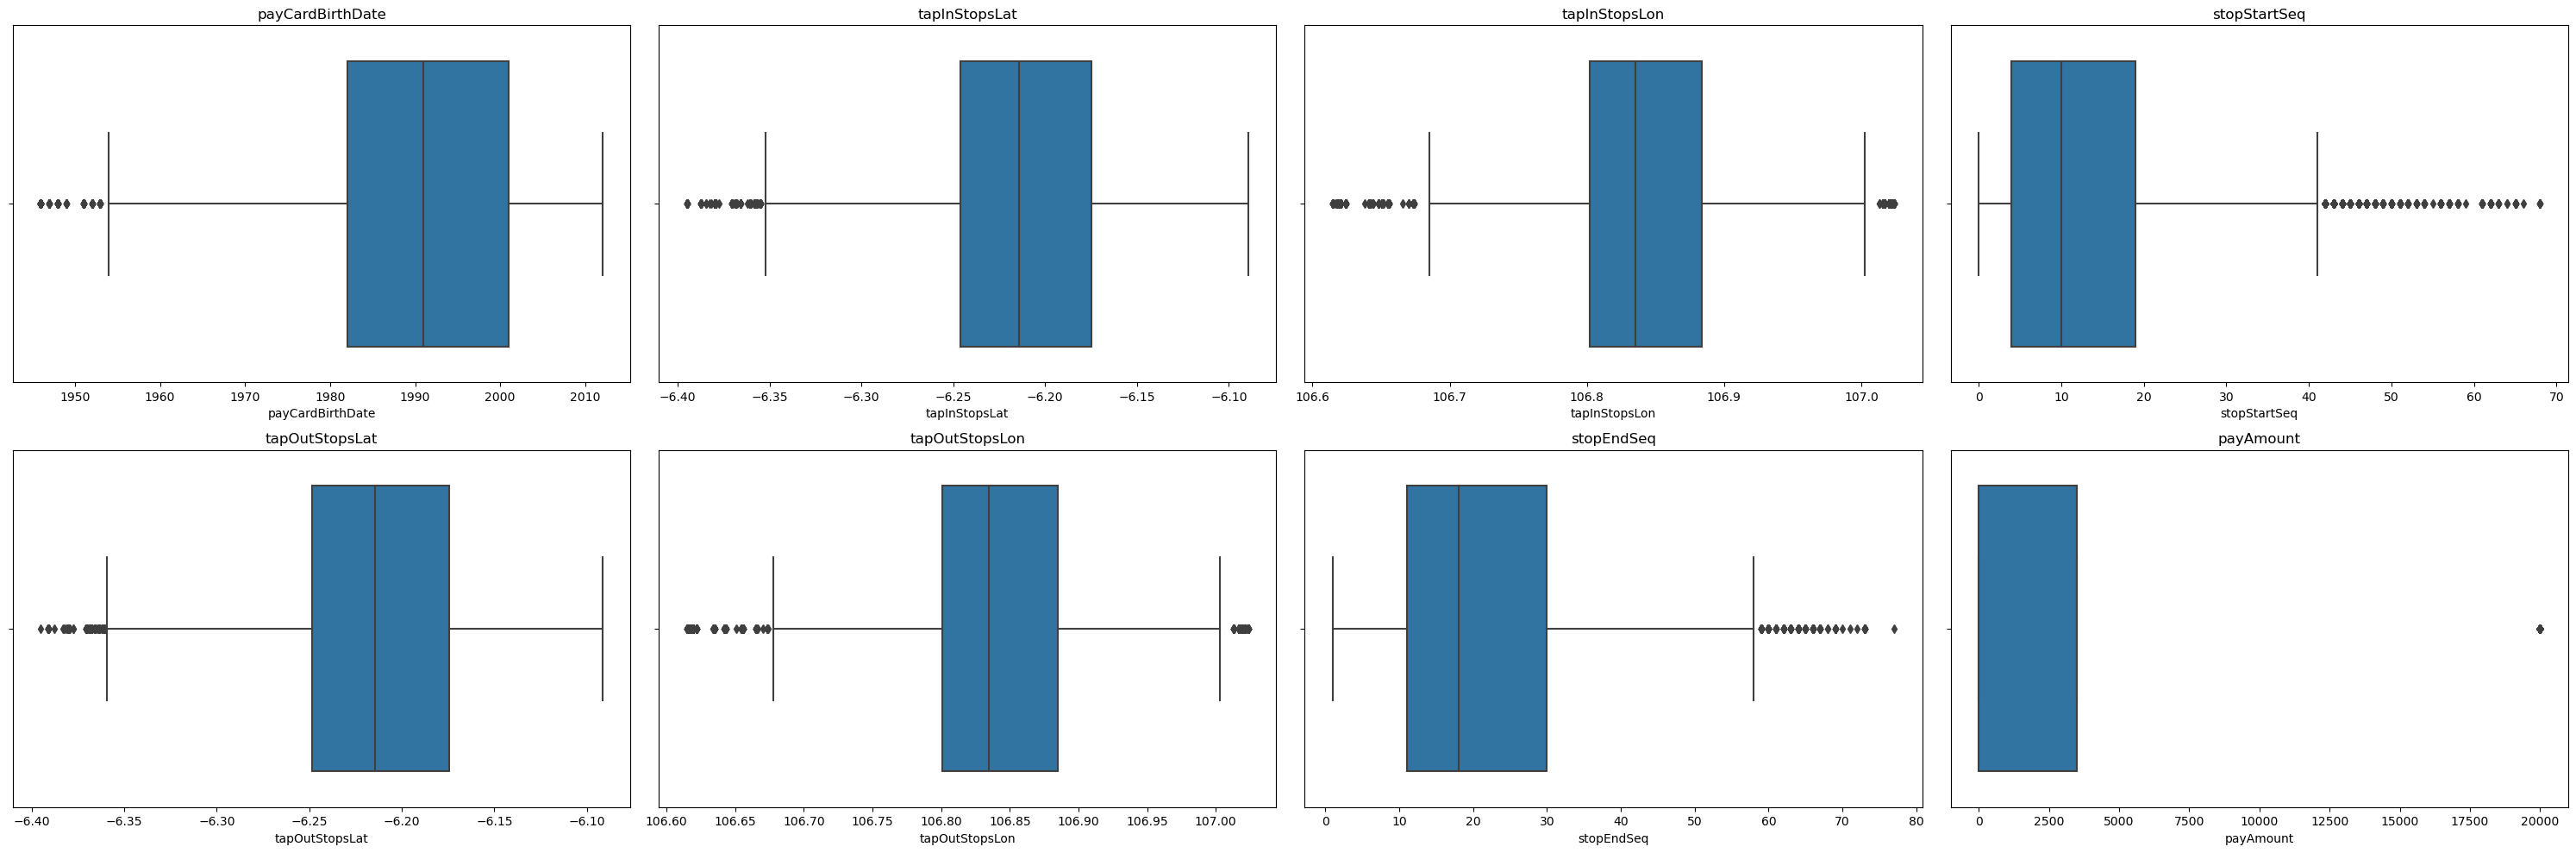

In [58]:
# Membuat gambar matplotlib dengan ukuran tertentu (horizontal, vertikal)
fig = plt.figure(figsize=(30,10))

# Inisialisasi variabel hitungan
count = 0

# Iterasi melalui setiap kolom dalam kolom-kolom numerik
for kolom in numeric.columns:
    # Menambahkan hitungan
    count += 1
    
    # Membuat subplot dengan 2 baris dan 4 kolom
    plt.subplot(2,4,count)
    
    # Membuat boxplot untuk kolom saat ini
    sns.boxplot(numeric, x=kolom)
    
    # Mengatur judul subplot dengan nama kolom
    plt.title(f'{kolom}')
    
# Menyesuaikan tata letak untuk mencegah tumpang tindih dan menampilkan plot
plt.tight_layout()
plt.show()


In [59]:
for column in numeric.columns:
    # Menghitung kuartil pertama (Q1)
    q1 = df_clean[column].describe().loc['25%']
    
    # Menghitung kuartil ketiga (Q3)
    q3 = df_clean[column].describe().loc['75%']
    
    # Menghitung Rentang Interkuartil (IQR)
    iqr = q3 - q1
    
    # Menghitung batas bawah
    lower_bound = q1 - 1.5 * iqr
    
    # Menghitung batas atas
    upper_bound = q3 + 1.5 * iqr 

    # Menghitung jumlah outliers
    jumlah_outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)].shape[0]
    
    # Menampilkan hasil jumlah outliers
    print(f"`{column}` memiliki {jumlah_outliers} outliers")

`payCardBirthDate` memiliki 323 outliers
`tapInStopsLat` memiliki 372 outliers
`tapInStopsLon` memiliki 534 outliers
`stopStartSeq` memiliki 1475 outliers
`tapOutStopsLat` memiliki 336 outliers
`tapOutStopsLon` memiliki 426 outliers
`stopEndSeq` memiliki 386 outliers
`payAmount` memiliki 1684 outliers


Outliers pada variabel `payCardBirthDate` menunjukkan variasi umur penumpang bus yang sebenarnya. Karena penumpang bus dapat bervariasi dari sangat muda hingga sangat tua, adanya outliers adalah sesuatu yang diharapkan dan tidak secara otomatis menunjukkan kesalahan atau masalah dalam data. Oleh karena itu, tidak ada alasan kuat untuk menghapus outliers ini.

Untuk variabel `tapInStopsLat`, `tapInStopsLon`, `tapOutStopsLat`, dan `tapOutStopsLon`, nilai-nilai yang tampak sebagai outliers sebenarnya mewakili lokasi halte yang jarang digunakan atau lokasi di ujung rute bus. Dalam konteks layanan bus, hal ini wajar dan penting untuk dipertahankan dalam data karena memberikan informasi lengkap tentang operasi layanan tersebut.

Variabel `stopStartSeq` dan `stopEndSeq` memiliki outliers yang mungkin mengindikasikan perjalanan yang sangat panjang atau sangat pendek. Seperti halnya variabel lokasi, variasi ini penting untuk memahami pola perjalanan dan oleh karena itu harus tetap ada dalam dataset.

Untuk variabel `payAmount`, perbedaan harga yang diamati mewakili struktur tarif yang sah dari layanan bus, termasuk tarif flat dan opsi premium. Oleh karena itu, nilai-nilai ini bukan kesalahan dan mencerminkan informasi harga yang sebenarnya, sehingga tidak perlu dihilangkan dari analisis.

Mempertahankan outliers dalam dataset ini memungkinkan analisis yang lebih akurat dan representatif dari kondisi layanan bus yang sesungguhnya.

In [60]:
# Export the DataFrame to a CSV file
df_clean.to_csv('Transjakarta_clean.csv', index=False)

# EDA (Exploratory Data Analysis)

In [61]:
# Ambil data dari csv
df_transjakarta_clean = pd.read_csv('Transjakarta_clean.csv')

# Show first 5 records
display(df_transjakarta_clean.head())

# Show last 5 records
display(df_transjakarta_clean.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
35431,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
35432,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
35433,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
35434,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
35435,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


- **Distribusi Tarif**: Melihat seberapa banyak transaksi yang terjadi pada setiap tarif yang berbeda.

- **Penggunaan Berdasarkan Jenis Kelamin dan Umur**: Memahami demografi pengguna untuk menentukan apakah ada pola tertentu dalam penggunaan berdasarkan jenis kelamin atau kelompok umur.

- **Analisis Waktu Perjalanan**: Memeriksa waktu tap-in untuk mengetahui jam sibuk dan jam sepi, yang bisa membantu dalam penyesuaian tarif.

- **Frekuensi Penggunaan Koridor**: Identifikasi koridor yang paling dan paling sedikit digunakan untuk menargetkan penyesuaian tarif.

- **Pola Perjalanan**: Melihat dari mana ke mana penumpang biasanya bepergian untuk mengidentifikasi rute populer yang mungkin memerlukan penyesuaian tarif.

## Distribusi Tarif

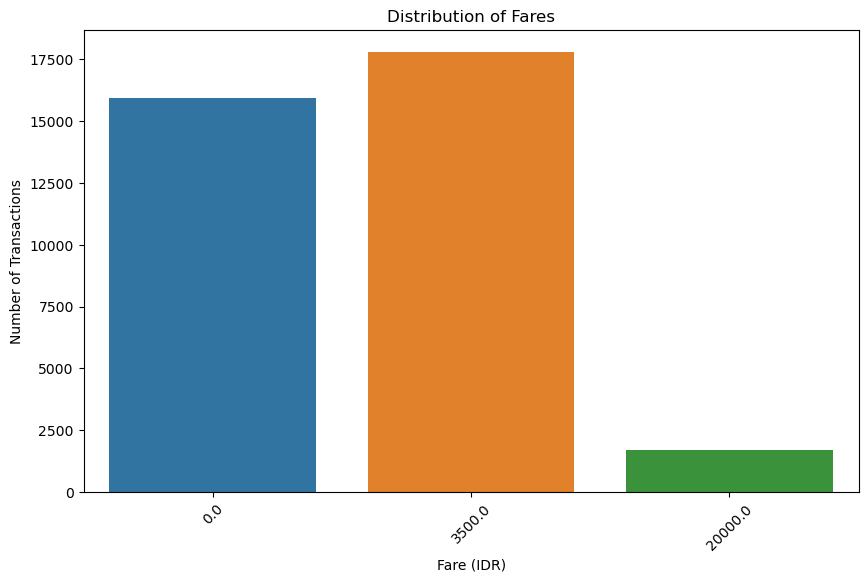

In [62]:
# Analyze fare distribution
fare_distribution = df_transjakarta_clean['payAmount'].value_counts().sort_index()

# Plot fare distribution
plt.figure(figsize=(10, 6))
fare_distribution_plot = sns.barplot(x=fare_distribution.index, y=fare_distribution.values)
fare_distribution_plot.set_title('Distribution of Fares')
fare_distribution_plot.set_xlabel('Fare (IDR)')
fare_distribution_plot.set_ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

**Distribusi Tarif**
- Sebagian besar transaksi terjadi pada tarif flat IDR 3.500, yang mungkin merupakan tarif standar untuk sebagian besar perjalanan.
- Ada juga transaksi dengan tarif lain, yang kemungkinan mencakup perjalanan gratis dan layanan bus premium dengan tarif IDR 20.000. Namun, data tersebut tidak secara eksplisit menunjukkan jumlah transaksi untuk setiap kategori tarif selain IDR 3.500.


## Penggunaan Berdasarkan Jenis Kelamin dan Umur

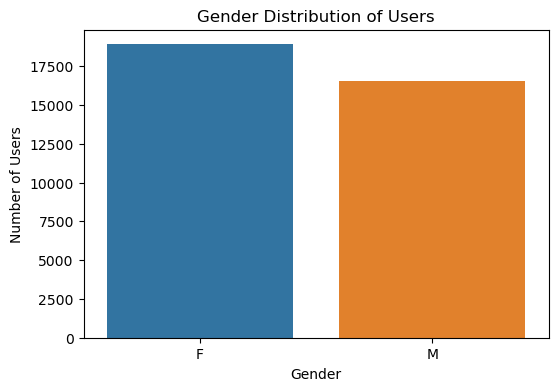

In [63]:
# Analyze user demographics - Gender
gender_distribution = df_transjakarta_clean['payCardSex'].value_counts()

# Plot gender distribution
plt.figure(figsize=(6, 4))
gender_distribution_plot = sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
gender_distribution_plot.set_title('Gender Distribution of Users')
gender_distribution_plot.set_xlabel('Gender')
gender_distribution_plot.set_ylabel('Number of Users')
plt.show()

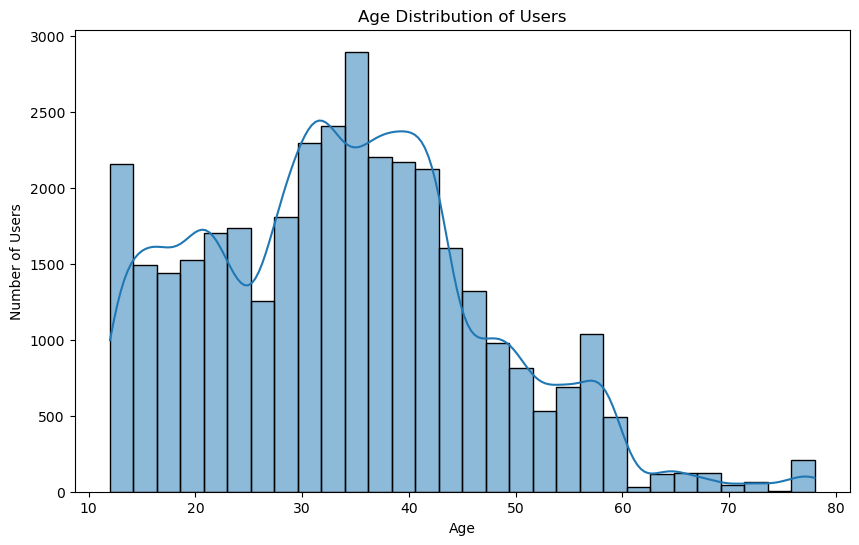

In [64]:
# Analyze user demographics - Age
current_year = pd.to_datetime('now').year
df_transjakarta_clean['userAge'] = current_year - df_transjakarta_clean['payCardBirthDate']

# Plot age distribution
plt.figure(figsize=(10, 6))
age_distribution_plot = sns.histplot(df_transjakarta_clean['userAge'], bins=30, kde=True)
age_distribution_plot.set_title('Age Distribution of Users')
age_distribution_plot.set_xlabel('Age')
age_distribution_plot.set_ylabel('Number of Users')
plt.show()


**Demografi Pengguna**
- Jenis Kelamin: Distribusi pengguna menunjukkan bahwa terdapat pengguna dari kedua jenis kelamin, dengan jumlah yang cukup seimbang antara laki-laki dan perempuan.
- Umur: Distribusi umur pengguna menunjukkan bahwa layanan Transjakarta digunakan oleh berbagai kelompok umur. Terdapat konsentrasi pengguna yang cukup signifikan di kelompok umur dewasa muda hingga dewasa, yang menunjukkan bahwa mayoritas pengguna mungkin adalah pekerja dan mahasiswa.

## Analisis Waktu Perjalanan

Kita akan menganalisis waktu tap-in untuk mengetahui kapan jam sibuk terjadi. Ini akan memberikan informasi tentang kapan permintaan terhadap layanan Transjakarta meningkat, yang bisa menjadi kesempatan untuk menyesuaikan tarif berdasarkan permintaan.

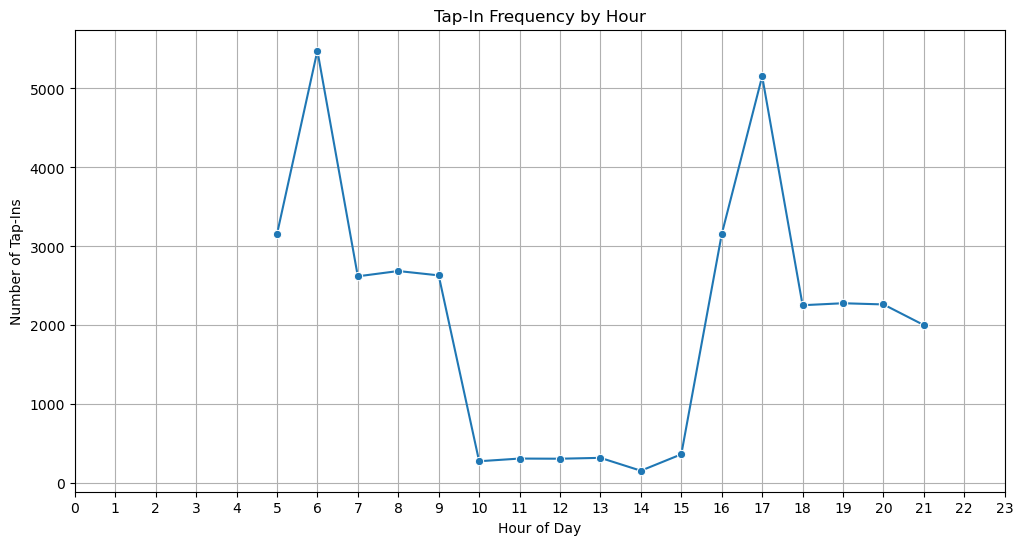

In [317]:
# Convert tapInTime to datetime to extract the hour
df_transjakarta_clean['tapInHour'] = pd.to_datetime(df_transjakarta_clean['tapInTime']).dt.hour

# Analyze peak hours
peak_hours_distribution = df_transjakarta_clean['tapInHour'].value_counts().sort_index()

# Plot peak hours distribution
plt.figure(figsize=(12, 6))
peak_hours_plot = sns.lineplot(x=peak_hours_distribution.index, y=peak_hours_distribution.values, marker='o')
peak_hours_plot.set_title('Tap-In Frequency by Hour')
peak_hours_plot.set_xlabel('Hour of Day')
peak_hours_plot.set_ylabel('Number of Tap-Ins')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Dari distribusi frekuensi tap-in berdasarkan jam, kita dapat melihat bahwa terdapat dua puncak utama yang mengindikasikan jam sibuk:

- Pagi hari, sekitar jam 5 hingga 9, dengan puncak tertinggi sekitar jam 7. Ini kemungkinan mencerminkan perjalanan pagi hari orang-orang yang berangkat kerja atau sekolah.
- Sore hingga awal malam, sekitar jam 16 hingga 19, dengan puncak tertinggi sekitar jam 17-18, yang kemungkinan merupakan perjalanan pulang kerja atau sekolah.

## Analisis Frekuensi Penggunaan Koridor

Kita juga akan menganalisis frekuensi penggunaan setiap koridor untuk mengetahui koridor mana yang paling sering dan paling jarang digunakan. Ini bisa membantu dalam menentukan di mana penyesuaian tarif atau peningkatan layanan mungkin diperlukan.

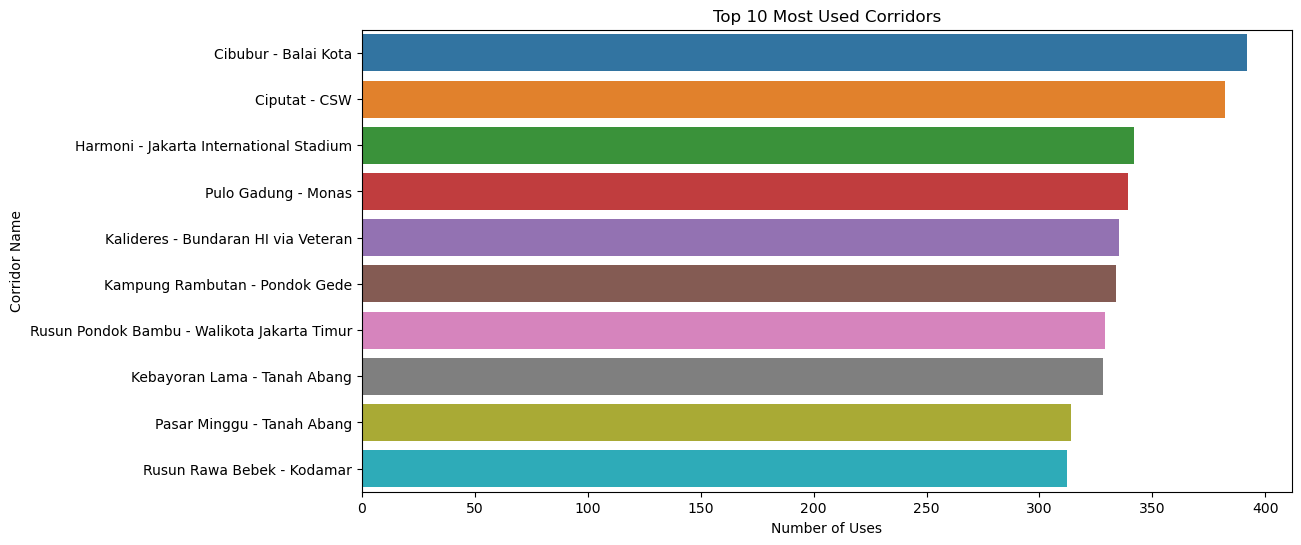

In [65]:
# Analyze corridor usage frequency
corridor_usage_frequency = df_transjakarta_clean['corridorName'].value_counts().head(10)

# Plot corridor usage frequency
plt.figure(figsize=(12, 6))
corridor_usage_plot = sns.barplot(x=corridor_usage_frequency.values, y=corridor_usage_frequency.index)
corridor_usage_plot.set_title('Top 10 Most Used Corridors')
corridor_usage_plot.set_xlabel('Number of Uses')
corridor_usage_plot.set_ylabel('Corridor Name')
plt.show()


Untuk koridor yang paling sering digunakan, data menunjukkan 10 koridor teratas berdasarkan frekuensi penggunaan. Koridor-koridor ini mungkin merupakan area dengan permintaan tinggi dan bisa menjadi kandidat untuk penyesuaian tarif atau peningkatan layanan guna meningkatkan pendapatan.

## Pola Perjalanan

<Axes: ylabel='route'>

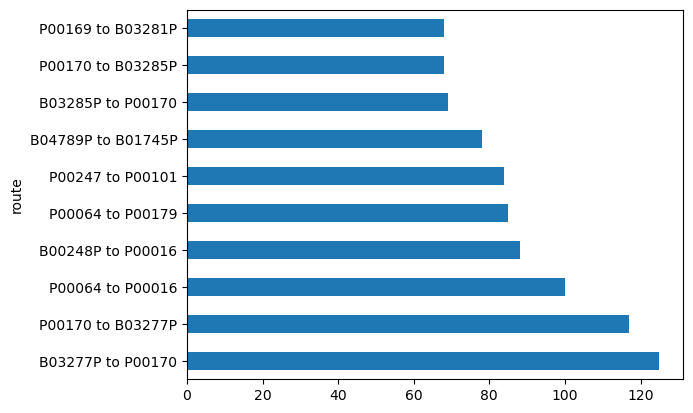

In [66]:
# Gabungkan kolom tapInStops dan tapOutStops untuk membuat kolom rute unik
df_transjakarta_clean['route'] = df_transjakarta_clean['tapInStops'] + ' to ' + df_transjakarta_clean['tapOutStops']

# Hitung frekuensi untuk setiap rute
route_frequency = df_transjakarta_clean['route'].value_counts().head(10)

# Visualisasikan rute terpopuler
route_frequency.plot(kind='barh')


Implikasi untuk Optimalisasi Tarif
- Distribusi tarif yang terfokus pada IDR 3.500 mengindikasikan bahwa sebagian besar pengguna membayar tarif flat ini. Meninjau kembali struktur tarif dengan mempertimbangkan faktor seperti jarak perjalanan, waktu perjalanan (jam sibuk vs jam sepi), dan koridor mungkin dapat membantu dalam menyesuaikan tarif untuk meningkatkan pendapatan tanpa mengurangi jumlah penumpang.
- Pemahaman tentang demografi pengguna dapat membantu dalam menargetkan subsidi atau program diskon bagi kelompok pengguna tertentu, seperti pelajar atau lansia, sambil menyesuaikan tarif reguler untuk kelompok demografi lain.
- Jam Sibuk: Mengetahui jam sibuk dapat membantu dalam menerapkan tarif dinamis, dimana tarif dapat sedikit dinaikkan pada jam-jam dengan permintaan tinggi untuk meningkatkan pendapatan, sambil tetap mempertimbangkan keseimbangan antara permintaan dan aksesibilitas layanan.
- Koridor Populer: Koridor dengan frekuensi penggunaan tinggi dapat diidentifikasi sebagai target untuk penyesuaian tarif spesifik atau penawaran layanan premium, mungkin dengan bus yang lebih nyaman atau dengan frekuensi yang lebih tinggi untuk mengurangi kepadatan.
- Pola Perjalanan: Analisis pola perjalanan menunjukkan rute-rute tertentu yang memiliki jumlah perjalanan yang tinggi dan dapat dianggap sebagai rute premium. Misalnya, rute dari P00170 ke B03277P dan sebaliknya menunjukkan volume tinggi, yang mungkin menandakan permintaan yang tinggi untuk layanan di koridor tersebut. Transjakarta bisa mempertimbangkan untuk menambahkan lebih banyak layanan, atau bahkan layanan eksklusif dengan tarif yang lebih tinggi, yang bisa mencakup bus dengan kapasitas yang lebih besar atau kenyamanan tambahan.

Dengan analisis ini, kita telah mengidentifikasi peluang untuk penyesuaian tarif berdasarkan waktu dan lokasi yang bisa diimplementasikan untuk meningkatkan pendapatan Transjakarta tanpa secara signifikan mengurangi aksesibilitas atau kepuasan pengguna

Temuan Utama:
- Distribusi Tarif: Sebagian besar pengguna membayar tarif flat IDR 3.500, menunjukkan bahwa mungkin ada ruang untuk pengenalan tarif berbasis jarak atau waktu (misalnya, tarif dinamis selama jam sibuk) untuk meningkatkan pendapatan.
- Demografi Pengguna: Terdapat distribusi pengguna yang seimbang antara jenis kelamin dan berbagai kelompok umur, yang mengindikasikan bahwa kebijakan tarif dapat disesuaikan untuk menargetkan segmen pengguna tertentu tanpa secara signifikan mengurangi keberagaman penggunaan.
- Jam Sibuk: Terdapat pola perjalanan yang jelas menunjukkan jam sibuk di pagi dan sore hari, yang bisa menjadi target untuk penerapan tarif dinamis.
- Koridor Populer: Beberapa koridor menunjukkan penggunaan yang jauh lebih tinggi dibandingkan yang lain, menunjukkan potensi untuk penyesuaian tarif berbasis koridor atau peningkatan layanan.
- Pola Perjalanan: Analisis pola perjalanan mengungkapkan rute tertentu yang sangat sibuk, menunjukkan rute-rute yang mungkin memerlukan penyesuaian tarif, seperti tarif lebih tinggi untuk rute yang sangat padat atau penawaran layanan khusus yang dapat memenuhi permintaan tinggi ini secara lebih efektif dan nyaman.

### Implementasi Tarif Dinamis
- **Deskripsi**: Menyesuaikan tarif berdasarkan waktu perjalanan, dengan tarif lebih tinggi pada jam sibuk untuk mengelola permintaan dan meningkatkan pendapatan.
- **Alasan**: Tujuan utama adalah untuk mengelola permintaan selama jam sibuk dan memaksimalkan pendapatan selama periode dengan volume tinggi.
- **Implementasi**: Melakukan analisis data waktu tap-in untuk menentukan jam sibuk (misalnya, 07:00-09:00 dan 17:00-19:00) dan menetapkan tarif yang lebih tinggi pada periode tersebut. Tarif bisa dinaikkan sebesar 10-20% selama jam sibuk tersebut.
- **Dampak Positif**:
  - **Pendapatan Meningkat**: Dapat meningkatkan pendapatan selama jam sibuk, saat permintaan layanan tinggi.
  - **Pengelolaan Permintaan**: Membantu mengatur kepadatan penumpang dan meningkatkan kenyamanan perjalanan.
- **Dampak Negatif**:
  - **Persepsi Negatif**: Penumpang mungkin merasa tarif yang lebih tinggi selama jam sibuk sebagai beban tambahan.
  - **Pengurangan Penggunaan**: Beberapa pengguna mungkin memilih alternatif transportasi lain selama jam sibuk untuk menghindari tarif yang lebih tinggi.

### Tarif Berbasis Jarak
- **Deskripsi**: Mengenakan tarif yang bervariasi berdasarkan jarak perjalanan penumpang, dengan tujuan menawarkan struktur tarif yang lebih adil dan mendorong penggunaan untuk perjalanan jarak jauh.
- **Alasan**: Pendekatan ini memungkinkan penyesuaian tarif yang lebih adil berdasarkan penggunaan layanan, dan dapat mendorong perjalanan jarak jauh yang lebih banyak, meningkatkan pendapatan secara keseluruhan.
- **Implementasi**: Menggunakan data tap-in dan tap-out untuk menghitung jarak perjalanan dan menyesuaikan tarif berdasarkan jarak. Misalnya, tarif dasar untuk 5 km pertama, diikuti dengan penambahan tarif per kilometer untuk jarak yang melebihi 5 km.
- **Dampak Positif**:
  - **Keadilan Tarif**: Menawarkan struktur tarif yang lebih adil, di mana penumpang membayar berdasarkan jarak yang ditempuh.
  - **Pendapatan dari Perjalanan Jarak Jauh**: Meningkatkan pendapatan dari perjalanan jarak jauh, yang mungkin sebelumnya disubsidi oleh tarif flat.
- **Dampak Negatif**:
  - **Kompleksitas Implementasi**: Membutuhkan sistem tracking yang akurat untuk tap-in dan tap-out, meningkatkan kompleksitas sistem.
  - **Ketidakpastian Biaya bagi Pengguna**: Pengguna mungkin kesulitan mengestimasi biaya perjalanan mereka sebelumnya, yang bisa menurunkan kepuasan pengguna.

### Program Diskon Target
- **Deskripsi**: Menawarkan diskon atau tarif khusus untuk kelompok pengguna tertentu seperti pelajar, lansia, atau pengguna off-peak, dengan tujuan meningkatkan penggunaan selama jam non-sibuk dan dari segmen pengguna tertentu.
- **Alasan**: Strategi ini bertujuan untuk meningkatkan jumlah pengguna dalam kelompok target yang mungkin lebih sensitif terhadap harga, sekaligus meningkatkan pendapatan dan efisiensi layanan selama jam-jam dengan permintaan rendah.
- **Implementasi**: Mengidentifikasi kelompok pengguna melalui data demografis dan menawarkan promosi atau tarif khusus. Misalnya, diskon 50% untuk pelajar dan lansia selama jam non-sibuk.
- **Dampak Positif**:
  - **Peningkatan Aksesibilitas**: Meningkatkan aksesibilitas layanan bagi kelompok target yang lebih sensitif terhadap harga.
  - **Penggunaan di Jam Non-Sibuk**: Dapat meratakan permintaan sepanjang hari, mengurangi kepadatan selama jam sibuk.
- **Dampak Negatif**:
  - **Pendapatan Berkurang**: Penawaran diskon dapat mengurangi pendapatan dari segmen penumpang tertentu.
  - **Kompleksitas Administrasi**: Memerlukan sistem untuk verifikasi status pelajar, lansia, dll., yang bisa menambah beban administrasi.

### Analisis Elastisitas Permintaan
- **Deskripsi**: Memahami bagaimana perubahan harga mempengaruhi permintaan layanan, untuk memastikan bahwa perubahan tarif tidak berdampak negatif pada jumlah pengguna.
- **Alasan**: Penting untuk memastikan bahwa optimalisasi tarif tidak akan secara signifikan mengurangi jumlah pengguna atau mengurangi aksesibilitas layanan.
- **Implementasi**: Mengumpulkan data historis tentang perubahan tarif dan analisis pengaruhnya terhadap jumlah penumpang. Ini bisa melibatkan analisis tren penumpang sebelum dan sesudah penerapan perubahan tarif.
- **Dampak Positif**:
  - **Pengambilan Keputusan yang Berbasis Data**: Membantu dalam membuat keputusan tarif yang informasinya didasarkan pada data historis dan analisis yang solid.
  - **Optimalisasi Pendapatan**: Dengan memahami respons pasar, Transjakarta dapat menyesuaikan tarif untuk mengoptimalkan pendapatan tanpa kehilangan penumpang.
- **Dampak Negatif**:
  - **Biaya dan Waktu Analisis**: Melakukan analisis elastisitas permintaan memerlukan waktu dan sumber daya.
  - **Potensi Resistensi Pengguna**: Perubahan tarif yang didasarkan pada hasil analisis ini mungkin tidak selalu diterima dengan baik oleh pengguna, khususnya jika menyebabkan peningkatan biaya perjalanan.

Dengan menerapkan pendekatan yang lebih spesifik dan berbasis data ini, Transjakarta dapat meningkatkan pendapatannya sambil mempertahankan atau bahkan meningkatkan kepuasan dan loyalitas pengguna. Setiap strategi ini perlu dilakukan dengan mempertimbangkan dampaknya terhadap pengguna dan permintaan layanan, dengan pilot awal dan evaluasi yang cermat untuk memastikan keberhasilan implementasi.